In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
%matplotlib inline
import seaborn as sns
#sns.set_style('darkgrid')
import numpy as np

In [13]:
#Without Ktrans
data =pd.read_csv("D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/Final.csv")

In [154]:
data.head(5)

ProxID                                 Name  fid  \
0  ProstateX-0000                          t2_tse_sag0    1   
1  ProstateX-0000           ep2d_diff_tra_DYNDIST_ADC0    1   
2  ProstateX-0000                          t2_tse_tra0    1   
3  ProstateX-0000      ep2d_diff_tra_DYNDISTCALC_BVAL0    1   
4  ProstateX-0001  ep2d_diff_tra_DYNDIST_MIXCALC_BVAL0    1   

                                                 pos         ijk  \
0                            25.7457 31.8707 -38.511  176 169 13   
1                            25.7457 31.8707 -38.511     36 72 9   
2                            25.7457 31.8707 -38.511   167 224 9   
3                            25.7457 31.8707 -38.511     36 72 9   
4  -40.5367071921656 29.320722668457 -16.70766907...    34 63 10   

   SpacingBetweenSlices       VoxelSpacing           Dim zone  ggg  
0                   3.6  0.5625,0.5625,3.6  320x320x19x1   PZ    3  
1                   3.0              2,2,3   84x128x19x1   PZ    3  
2                   3.0          0.5,0.5,3  384x384x19x1   PZ    3  
3                   3.0              2,2,3   84x128x19x1   PZ    3  
4                   3.0              2,2,3   84x128x19x1   AS    1

In [3]:
# Import all the necessary packages

import nibabel as nib # usually used for nueral imaging
import itk
import itkwidgets #to get the slide view
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

In [4]:
import SimpleITK as sitk #SimpleITK is a simplified, open-source interface to the Insight multidimensional image analysis &Segmentation and Registration Toolkit. 
import sys  
sys.path.insert(0, 'D:/MSCA/CAPSTONE/DORA-PROSTATE CHALLENGE/code2')  # for gui.py and myshow.py-
import gui   # module defined separately in .py
#import myshow

## Loading Dicom

Pydicom is a Python package for working with DICOM files. It allows us to read and easily manipulate DICOM files with the use of Python.

ITK (Insight Segmentation and Registration Toolkit) is a library that enables image processing, and it is widely used for the development of image segmentation and image registration programs. Here, we'll use SimpleITK, as it is a simplified interface to ITK.

Now, lets import the packages.

In [8]:
#Loading T2 transversal - Prostate X-0 from the directory
input_dir_dicom = r"D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/Download images (DICOM)/PROSTATEx/ProstateX-0000/07-07-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/4.000000-t2tsetra-00702"

In [9]:
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(input_dir_dicom)
reader.SetFileNames(dicom_names)
image_dicom = reader.Execute()
#image_dicom_cast = sitk.Cast(image_dicom, sitk.sitkFloat32)
origin=image_dicom.GetOrigin()

In [10]:
size_dicom = image_dicom.GetSize()
spacing_dicom = image_dicom.GetSpacing()
print("Image size:", size_dicom[0], size_dicom[1], size_dicom[2], spacing_dicom)
print("Image origin:", origin)  # taken acc to the position of the patient during scan
print("Image Pixel-1:", image_dicom.GetPixelID() )
print("Image Pixel-2:", image_dicom.GetPixelIDTypeAsString() ) # gives on how many bits that image was encoded on

Image size: 384 384 19 (0.5, 0.5, 2.9999999941936877)
Image origin: (-57.685436736033, -82.363056885483, -27.080757354715)
Image Pixel-1: 3
Image Pixel-2: 16-bit unsigned integer


In [11]:
size_dicom

(384, 384, 19)

In [12]:
#checking above Dim column of data.csv file
data[(data['ProxID']== 'ProstateX-0000') &  (data['Name']=='t2_tse_tra0')] 

ProxID         Name  fid                      pos        ijk  \
2  ProstateX-0000  t2_tse_tra0    1  25.7457 31.8707 -38.511  167 224 9   

   SpacingBetweenSlices VoxelSpacing           Dim zone  ggg  
2                   3.0    0.5,0.5,3  384x384x19x1   PZ    3

In [49]:
#Patients with more than 1 lesion
findings = pd.read_csv('D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/Download lesion information/ProstateX-2-Findings-Train.csv')
(findings['ProxID'].value_counts())[:13]
#There are 12 patients with more than 1 lesion

ProstateX-0196    3
ProstateX-0121    2
ProstateX-0139    2
ProstateX-0199    2
ProstateX-0179    2
ProstateX-0150    2
ProstateX-0173    2
ProstateX-0005    2
ProstateX-0203    2
ProstateX-0122    2
ProstateX-0002    2
ProstateX-0031    2
ProstateX-0114    1
Name: ProxID, dtype: int64

In [14]:
#ijk gives the position of the lesion. Dim gives the size of the 
#pixel array where() (x * X)pixels * no. of slices)

Now that we've calculated the dimensions, we can create a 3D NumPy array to address the first point discussed above. Note that a NumPy array is understood as a grid of values, all of the same type.

The following code creates a NumPy array called 'ImgArray' that has the same size as CalcPixelDims, and which contains the pixel data from all DICOM files in lstFilesDCM.

In [15]:
# CalcPixelDims=size_dicom
# ImgArray = np.zeros(CalcPixelDims, dtype=HeadDs.pixel_array.dtype)

# for filenameDCM in input_dir_dicom :
#     ds = pydicom.read_file(filenameDCM)
#     ImgArray[:, :, input_dir_dicom .index(filenameDCM)] = ds.pixel_array

### Loading ADC map nrrd data

In [25]:
import nrrd
import napari
from skimage import data, filters  # Just to generate some test data (3D blobs).
import SimpleITK as sitk

D:\Anaconda\lib\site-packages\napari\__init__.py:44: UserWarning: 
    napari was tested with QT library `>=5.12.3`.
    The version installed is 5.9.6. Please report any issues with this
    specific QT version at https://github.com/Napari/napari/issues.
    
  warn(message=warn_message)


In [25]:
# Define the image path and load the DWI-ADC data for Prosx-0000


In [26]:
image_path = "D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/intermediate/nrrd-train/ProstateX-0000_ep2d_diff_tra_DYNDIST_ADC.nrrd"


In [27]:
#Method 1

# using napari viewer and nrrd.read  ----too slow-------------Do not Run this part

readdata, header = nrrd.read(image_path)
#data, header = nrrd.read('output.nrrd', index_order='C')
print(readdata.shape)
print(header)


(84, 128, 19)
OrderedDict([('type', 'unsigned short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([ 84, 128,  19])), ('space directions', array([[ 1.99999842e+00, -7.97220992e-04, -2.38395955e-03],
       [ 4.00670200e-10,  1.89675290e+00, -6.34293659e-01],
       [ 3.77059170e-03,  9.51439964e-01,  2.84512778e+00]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([ -45.68544769, -112.71588898,  -16.94636345]))])


In [28]:
#checking with data,
data =pd.read_csv("D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/Final.csv")
data[(data['ProxID']=='ProstateX-0000') &  (data['Name']=='ep2d_diff_tra_DYNDIST_ADC0')] 

ProxID                        Name  fid                      pos  \
1  ProstateX-0000  ep2d_diff_tra_DYNDIST_ADC0    1  25.7457 31.8707 -38.511   

       ijk  SpacingBetweenSlices VoxelSpacing          Dim zone  ggg  
1  36 72 9                   3.0        2,2,3  84x128x19x1   PZ    3

In [29]:
# with napari.gui_qt():

# #     # Generate some test data (smooth 3D blob shapes)
# #     imgarray = filters.gaussian(np.squeeze(np.stack([data.binary_blobs(length=300, n_dim=3, blob_size_fraction=0.1, volume_fraction=0.05)[:, 0:256, 0:256]])).astype(float), sigma=(2.5, 2.5, 2.5))
# #     print(imgarray.shape)
#     '''
#     # If imgarray values are bytes (0..255), convert to floats for display.
#     imgarray = imgarray.astype(float) / 255
#     '''
# #     # Open viewer (Qt window) with axes = slice, row, column
# #     viewer = napari.Viewer(title='volume test', ndisplay=3, order=(0, 1, 2))
# #     viewer.add_image(data=imgarray, name='blobs', scale=[256/300, 1, 1], colormap='gray_trans', rendering='attenuated_mip', attenuation=2.0, contrast_limits=(0.25, 1))

# viewer = napari.Viewer(title='volume test', ndisplay=3, order=(0, 1, 2))
# viewer.add_image(data=readdata, name='blobs', scale=[256/300, 1, 1], colormap='gray_trans', rendering='attenuated_mip', attenuation=2.0, contrast_limits=(0.25, 1))


In [30]:
#  Method 2 -to load as well as point the lesions

## To point the findings/lesions on the Nrrd image

In [57]:
import sys  
sys.path.insert(0, 'D:/MSCA/CAPSTONE/DORA-PROSTATE CHALLENGE/code2')
import gui
#import myshow

In [58]:
data =pd.read_csv("D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/Final.csv")
data[(data['ProxID']=='ProstateX-0000') &  (data['Name']=='ep2d_diff_tra_DYNDIST_ADC0')] 

ProxID                        Name  fid                      pos  \
1  ProstateX-0000  ep2d_diff_tra_DYNDIST_ADC0    1  25.7457 31.8707 -38.511   

       ijk  SpacingBetweenSlices VoxelSpacing          Dim zone  ggg  
1  36 72 9                   3.0        2,2,3  84x128x19x1   PZ    3

In [60]:
# reading nrrd file ising sitk having gleason score3
# Define the image path and load the DWI-ADC data for Prosx-0000, PZ zone
image_path = "D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/intermediate/nrrd-train/ProstateX-0000_ep2d_diff_tra_DYNDIST_ADC.nrrd"

NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(image_path)
image_nrrd = NRRDreader.Execute();  
%matplotlib notebook

In [61]:
size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()
origin = image_nrrd.GetOrigin()

In [62]:
print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)
print("Image origin:", origin)  # image origin is dependendent on the position of the patient. Not so imp.

Image size: 84 128 19 (2.0, 2.0, 3.0000007152557377)
Image origin: (-45.68544769287109, -112.71588897705072, -16.946363449096687)


<IPython.core.display.Javascript object>


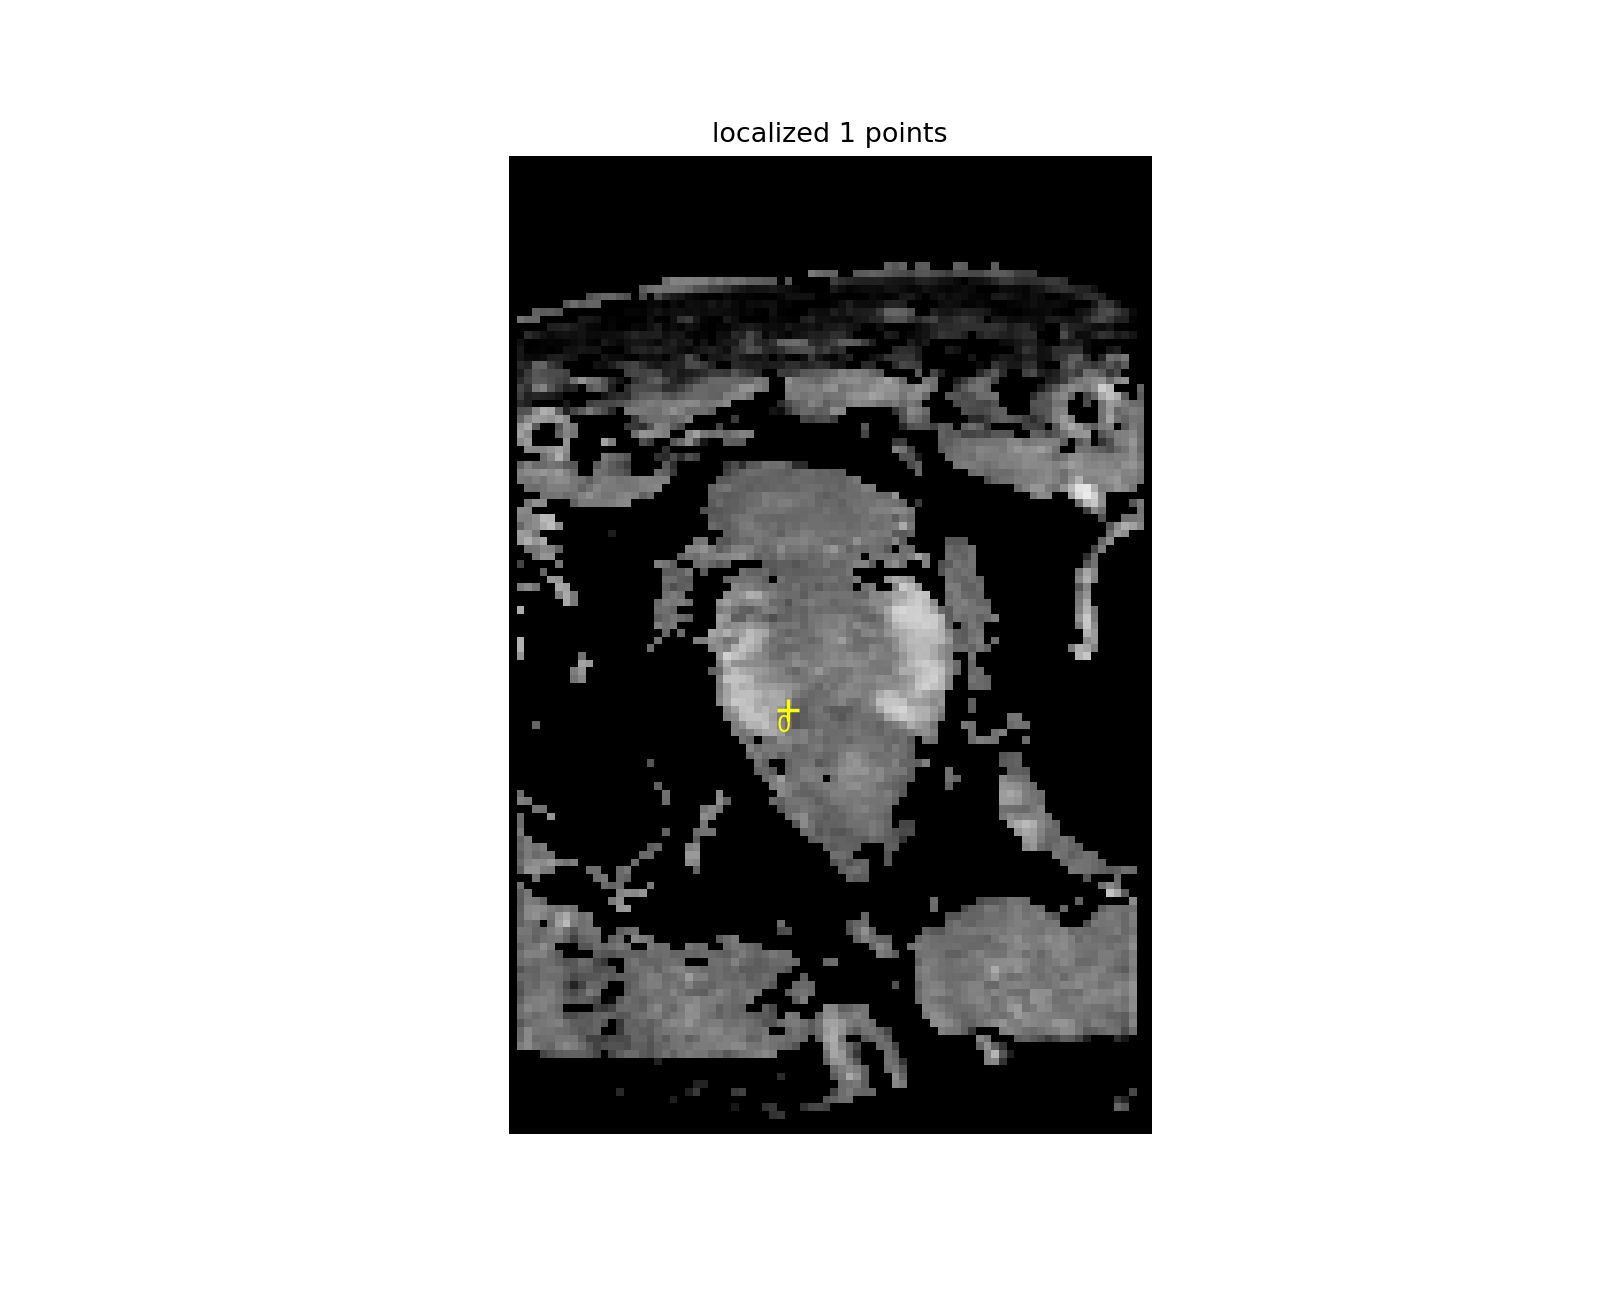

In [63]:
point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(36,72,9)])  #ijk

In [64]:
# to get region of interest
roi_acquisition_interface = gui.ROIDataAquisition(image_nrrd)

<IPython.core.display.Javascript object>

In [168]:
# Define the image path and load the T2 transversal data for Prosx-0000, PZ zone #gleason score 3
image_path = "D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/intermediate/nrrd-train/ProstateX-0000_t2_tse_tra.nrrd"

NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(image_path)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook

In [169]:
size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()
origin = image_nrrd.GetOrigin()
print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)
print("Image origin:", origin)  # image origin is dependendent on the position of the patient. Not so imp.

Image size: 384 384 19 (0.5000000000000001, 0.5000000000000001, 3.000002145767213)
Image origin: (-57.685436248779304, -82.3630599975586, -27.080757141113274)


<IPython.core.display.Javascript object>


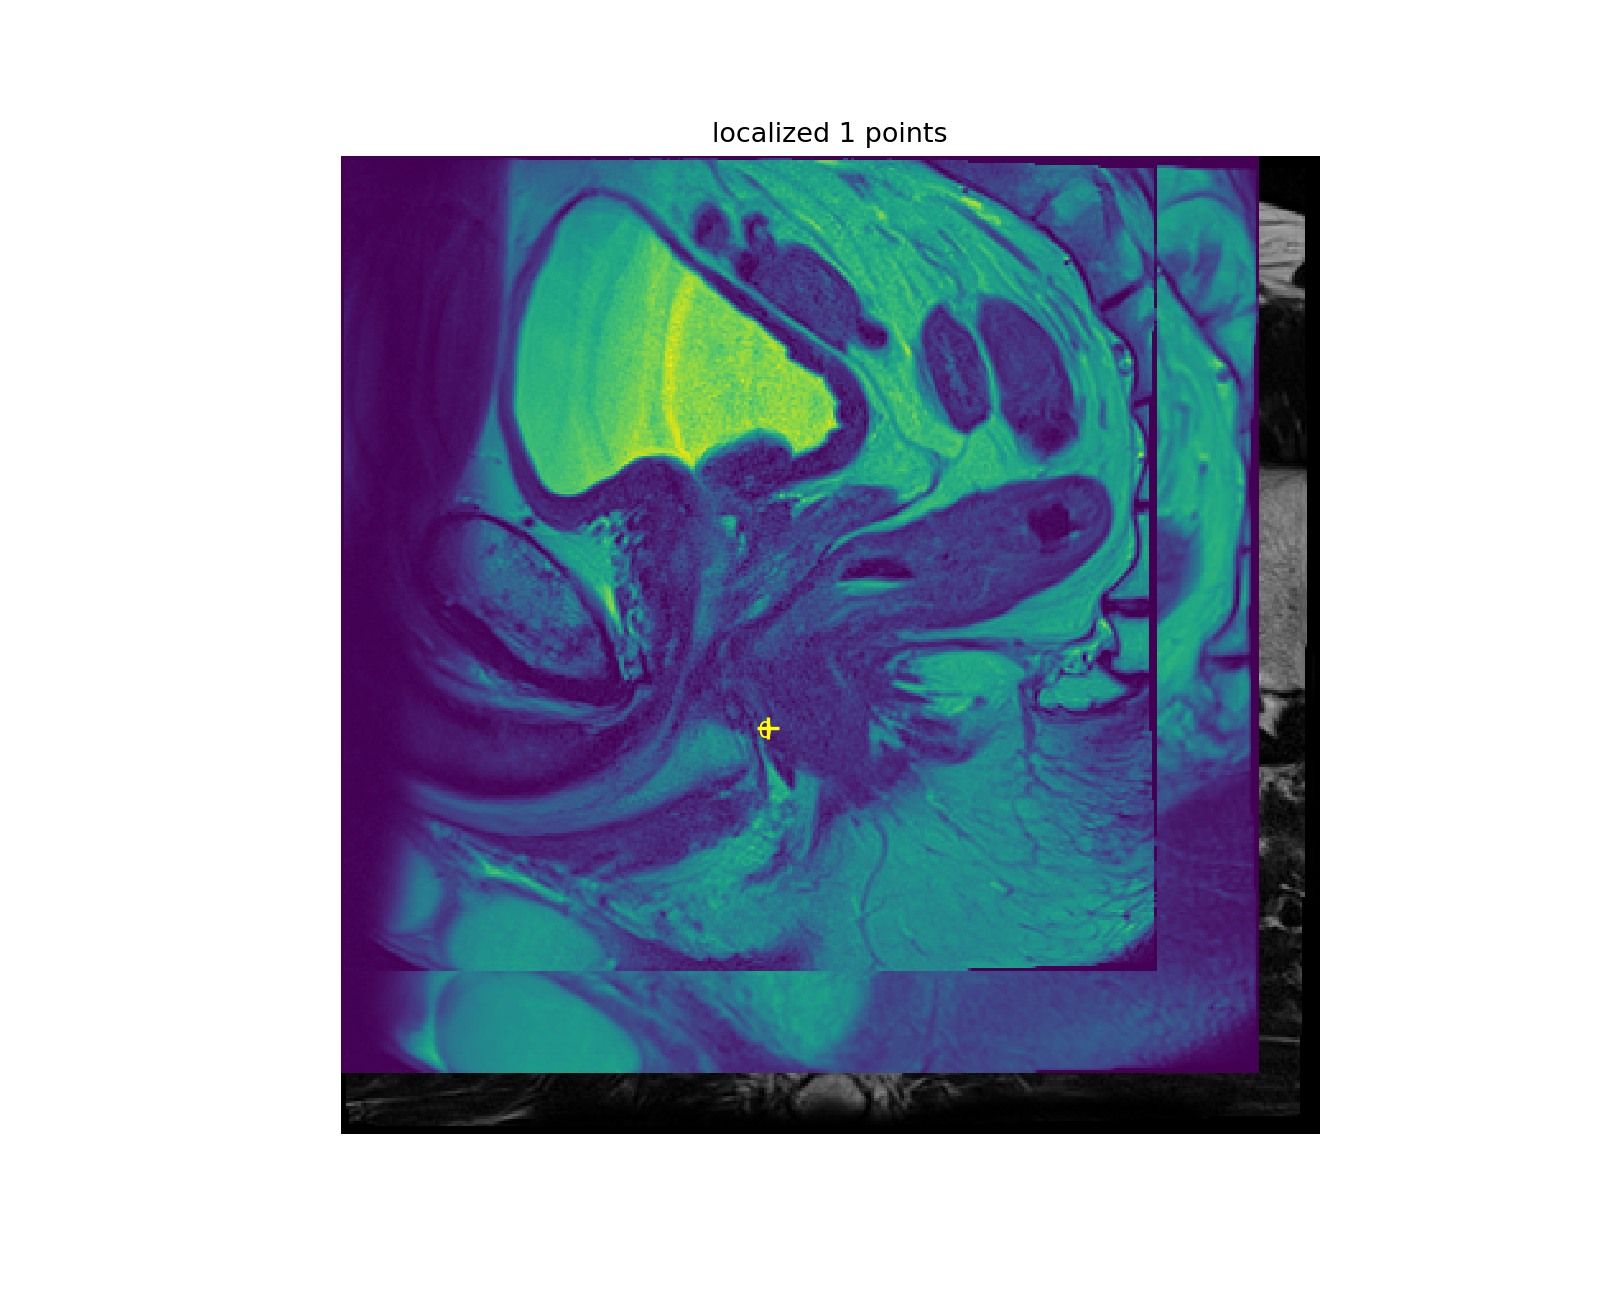

In [170]:
point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(167,224,9)])  #ijk

<IPython.core.display.Javascript object>


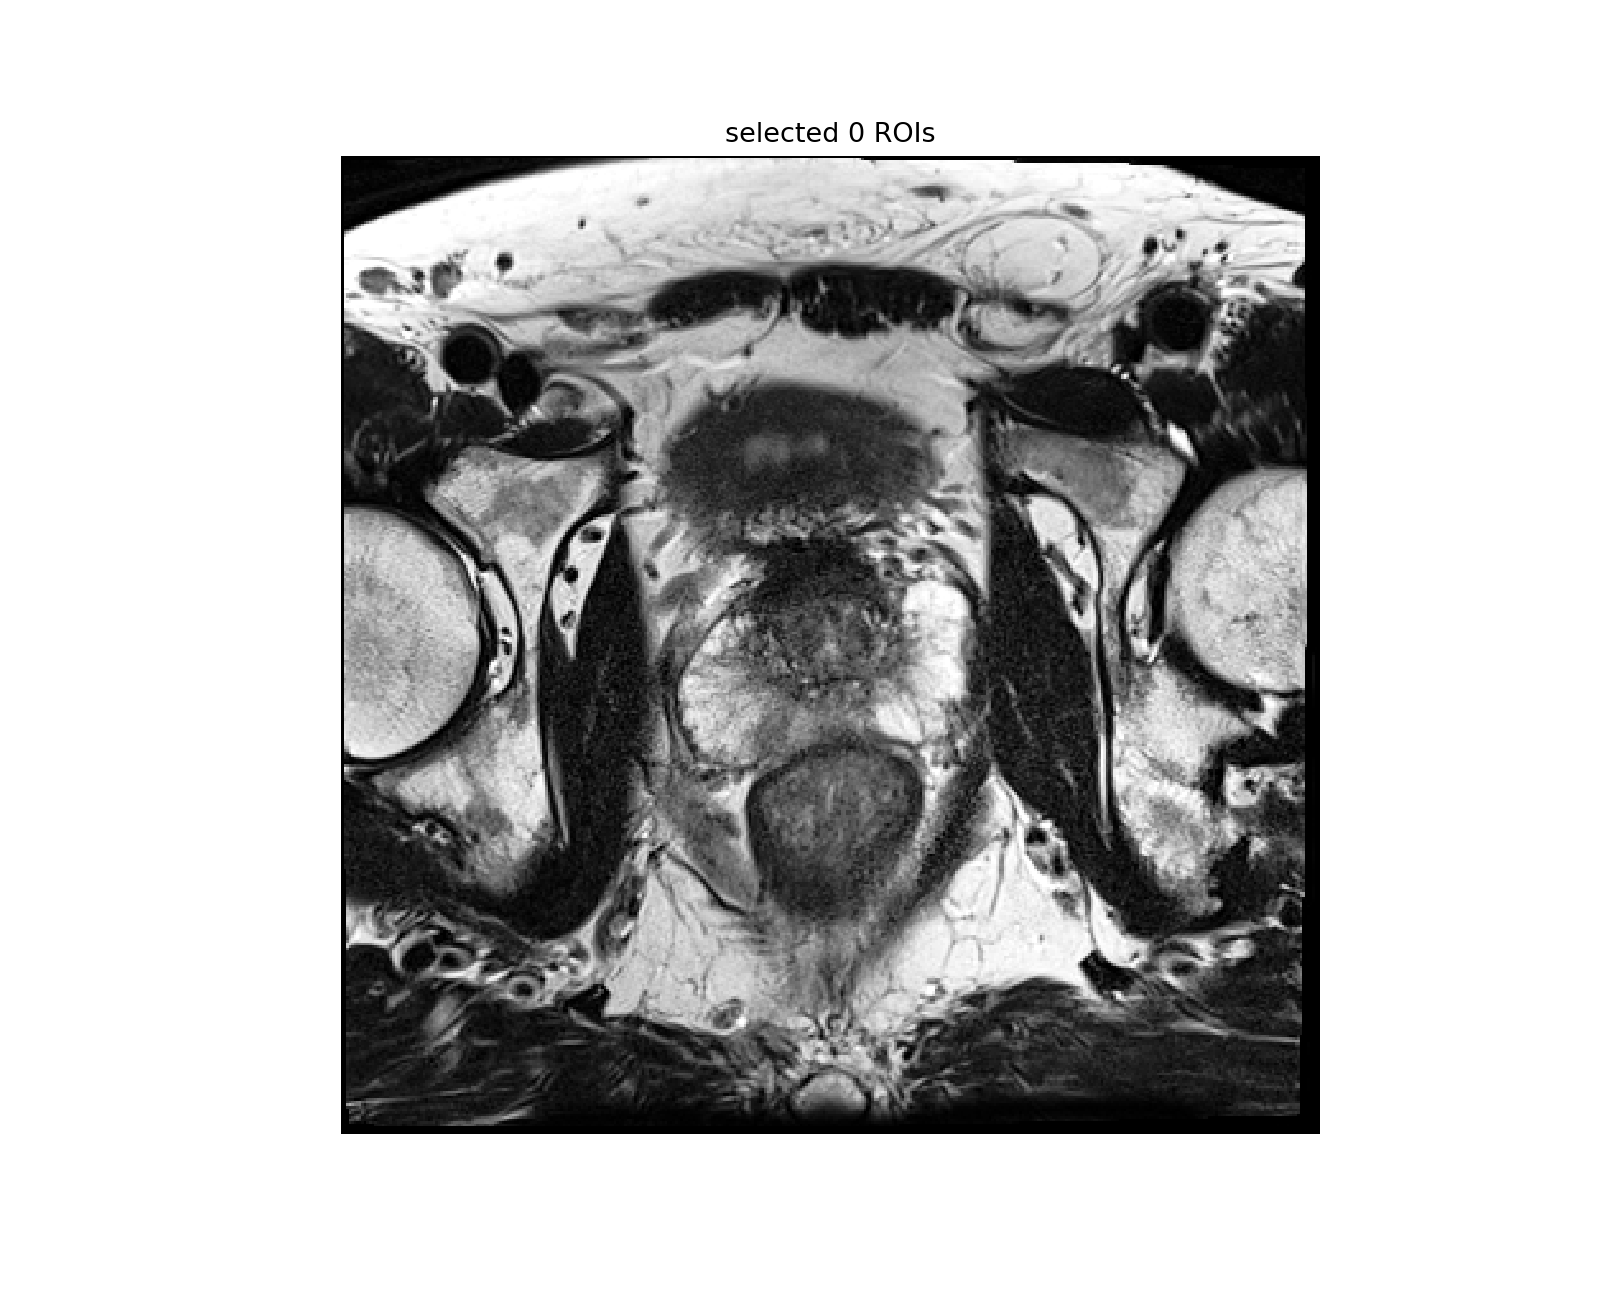

In [69]:
# to get region of interest
roi_acquisition_interface = gui.ROIDataAquisition(image_nrrd)

In [42]:
#checking a case with 2 lesion- Prox0005 in PZ zone
#Also in PZ zone DWI is predominant

In [43]:
image_path = "D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/intermediate/nrrd-train/ProstateX-0005_ep2d_diff_tra_DYNDIST_MIX_ADC_7.nrrd"
NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(image_path)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook
size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()
origin = image_nrrd.GetOrigin()

print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)
print("Image origin:", origin)  

point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(46,75,9), (34,71,9)])

Image size: 84 128 19 (2.0, 2.0, 3.000000953674317)
Image origin: (-105.02759552001956, -100.64813232421868, 6.8096995353698695)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


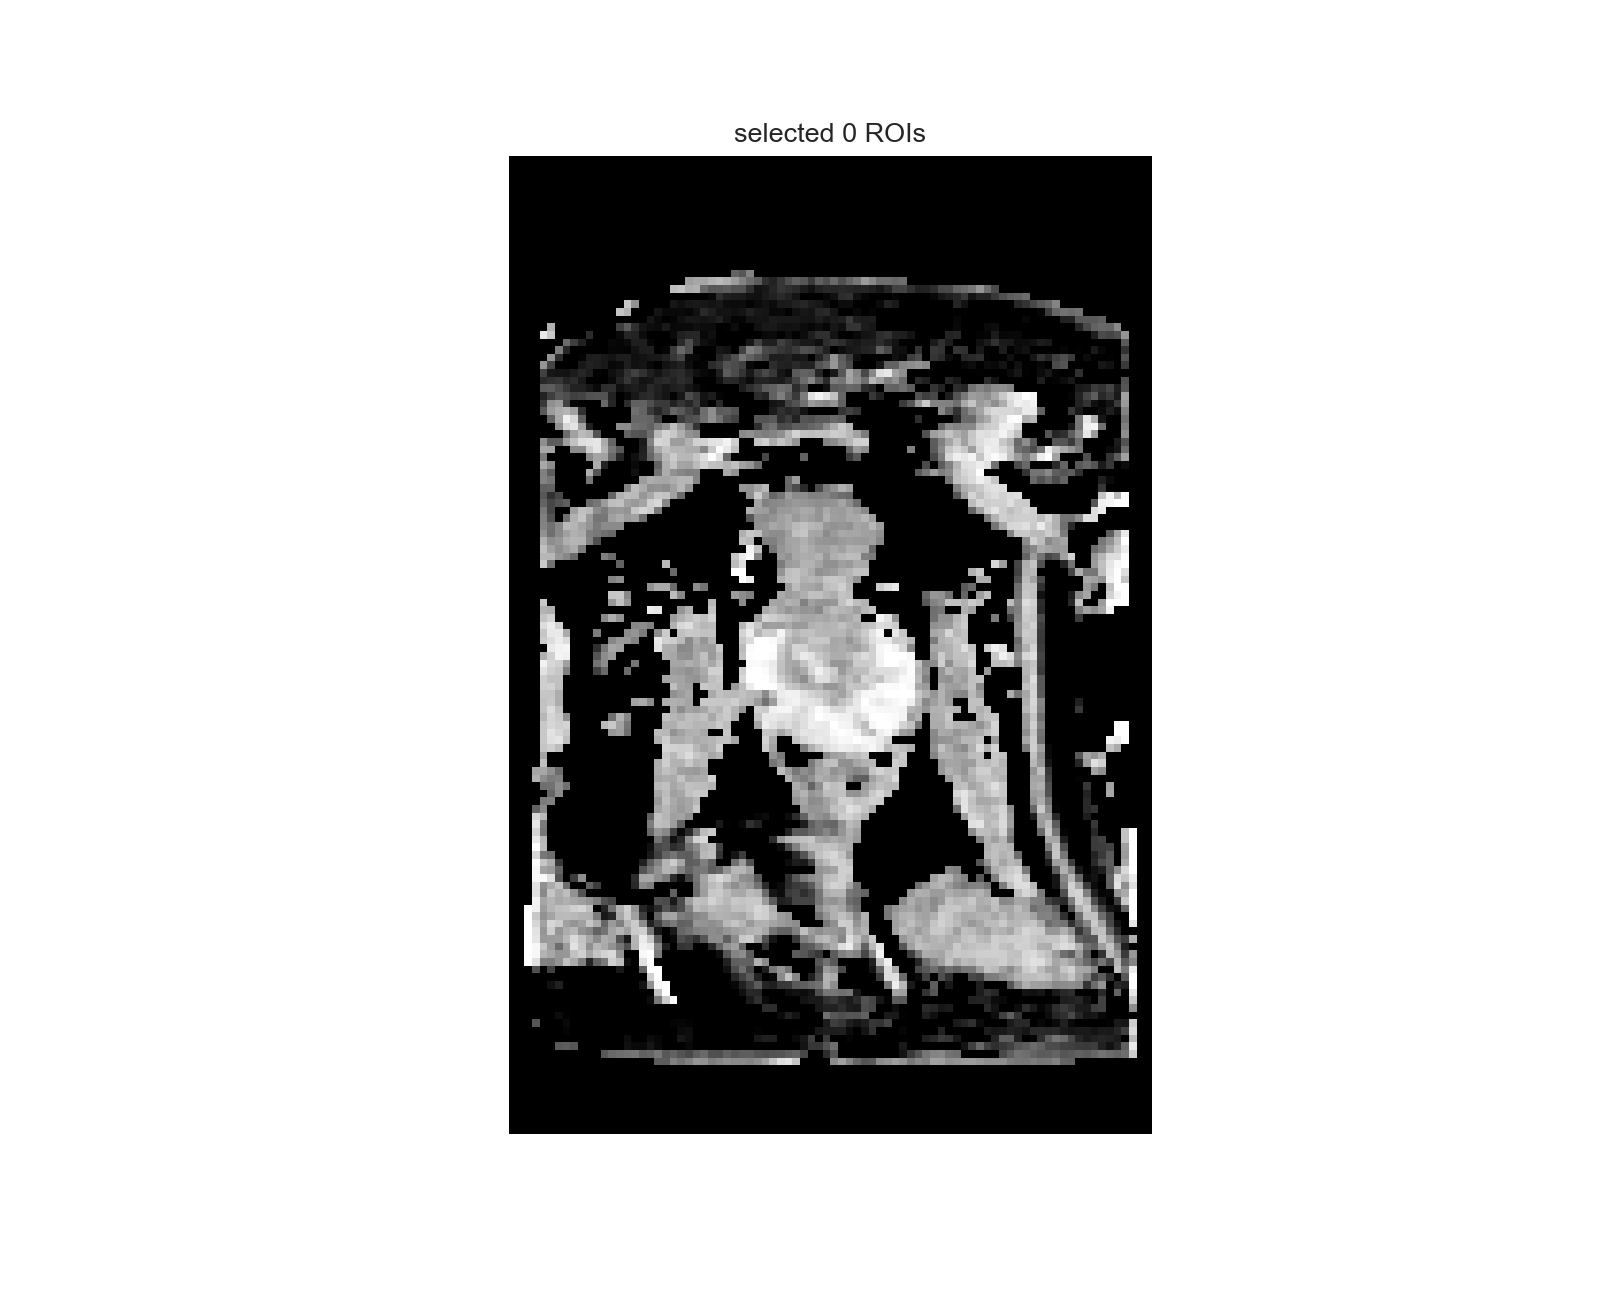

In [44]:
roi_acquisition_interface = gui.ROIDataAquisition(image_nrrd)

Image size: 384 384 19 (0.5, 0.49999999999999994, 3.000000476837158)
Image origin: (-117.02759552001953, -68.76989746093749, 4.020715713500977)


<IPython.core.display.Javascript object>


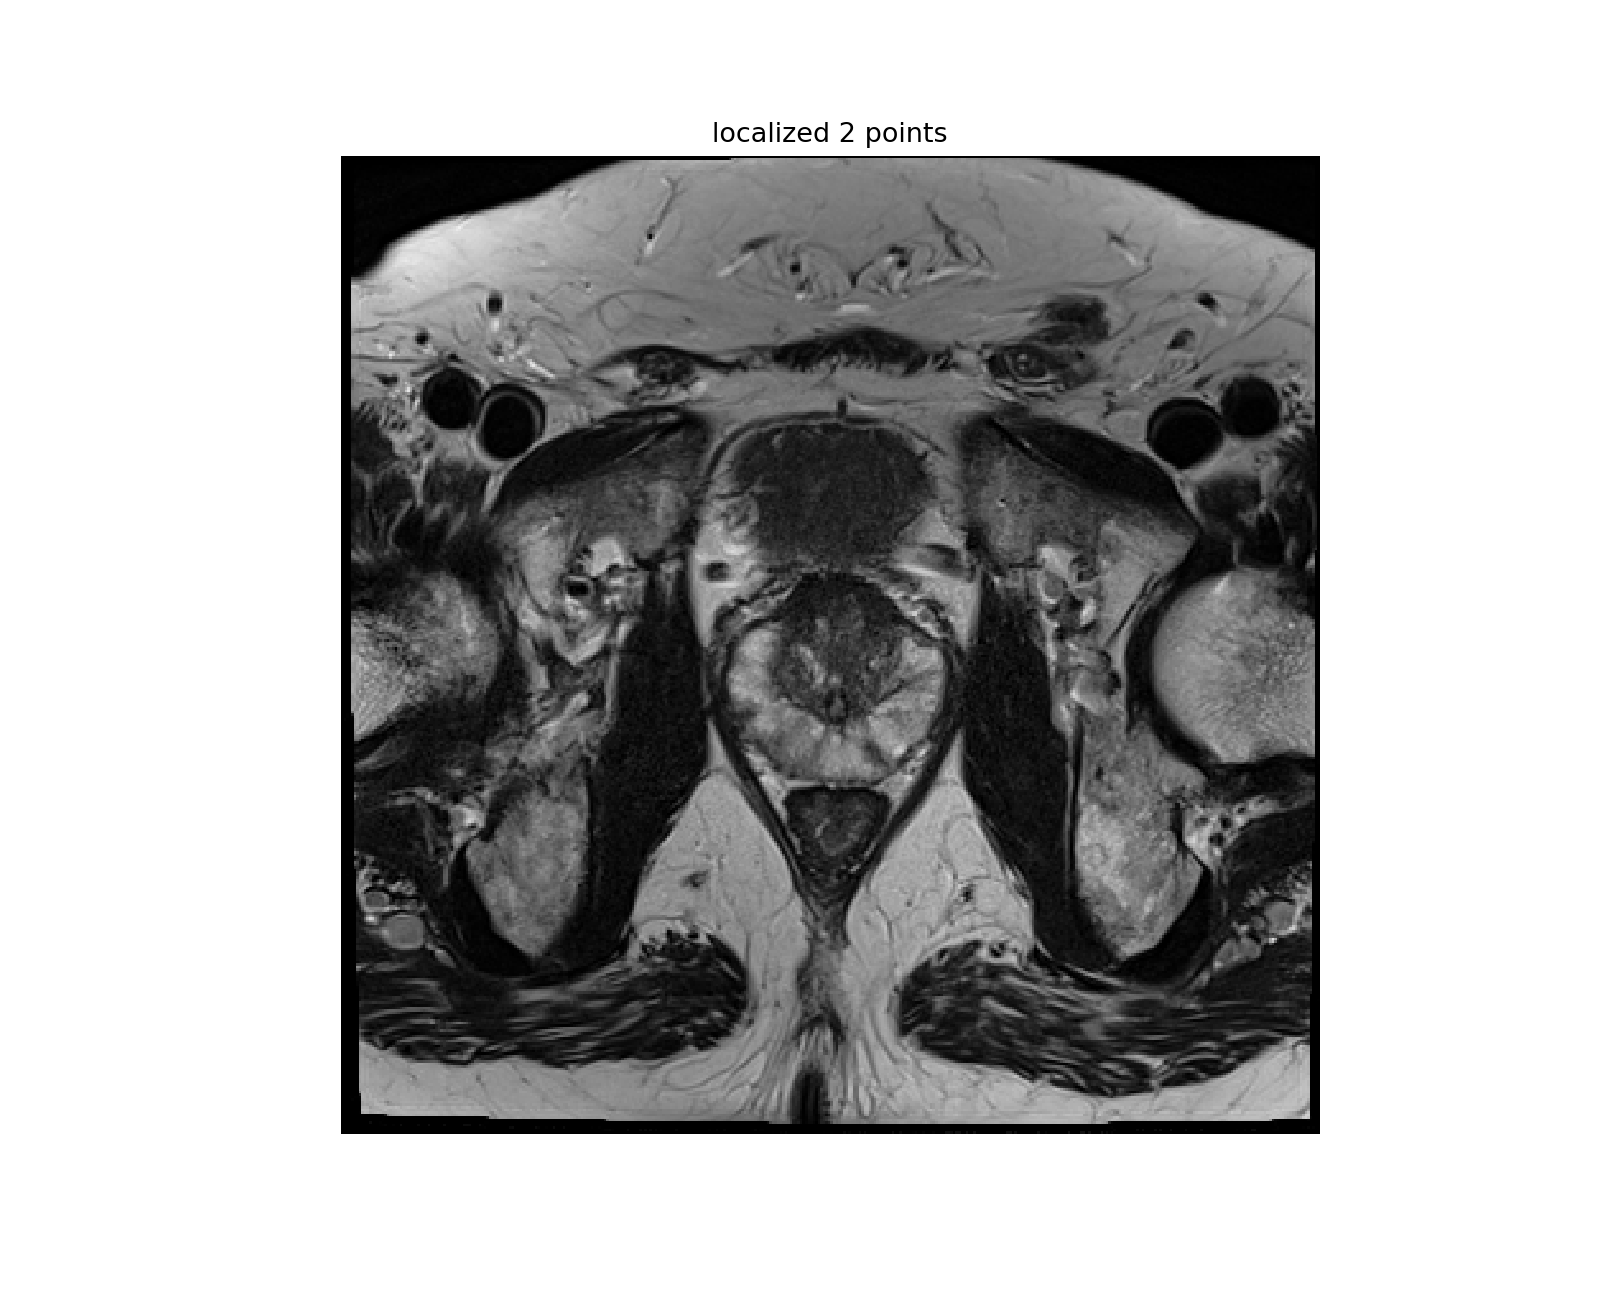

In [74]:
image_path = "D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/intermediate/nrrd-train/ProstateX-0005_t2_tse_tra_4.nrrd"
NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(image_path)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook
size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()
origin = image_nrrd.GetOrigin()

print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)
print("Image origin:", origin)  

point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(157,219,10), (206,233,10)])   #grade 3(left pz ), grade 2(right pz) resp

<IPython.core.display.Javascript object>


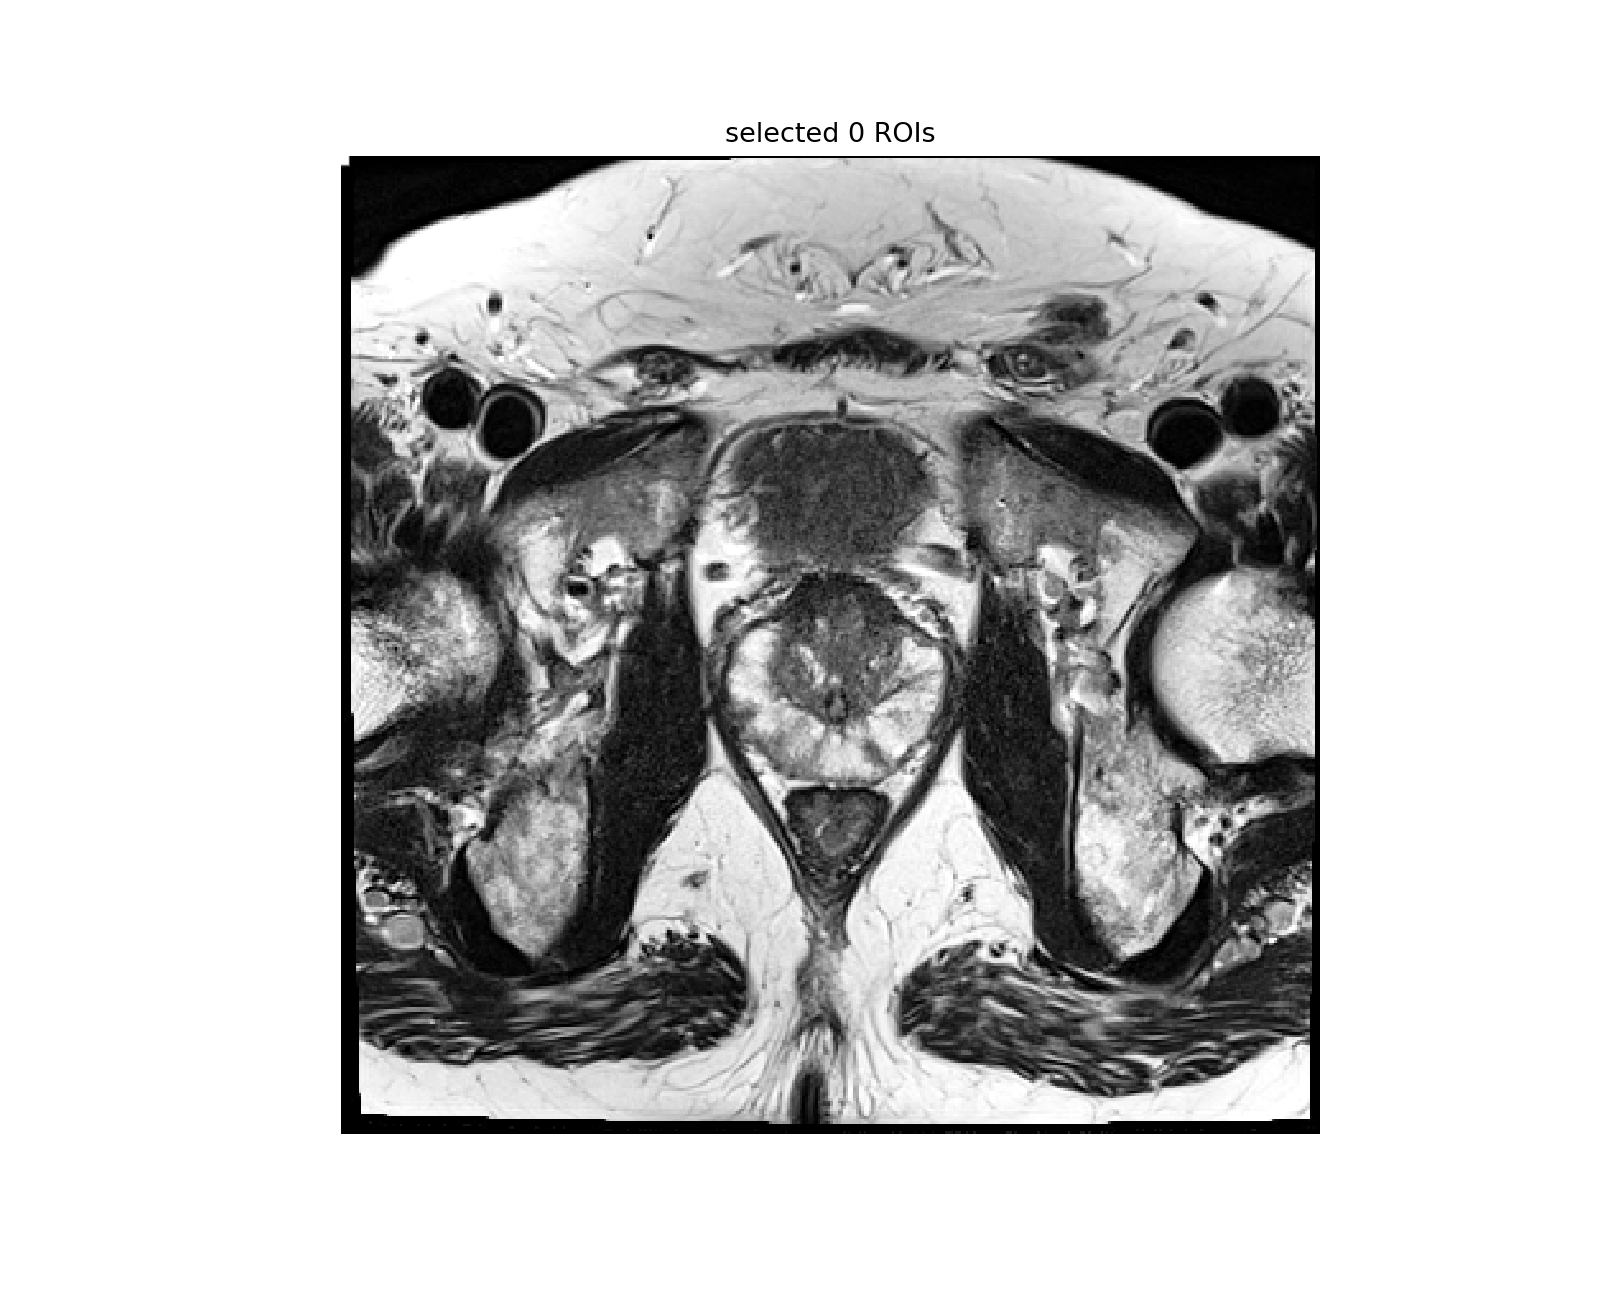

In [75]:
roi_acquisition_interface = gui.ROIDataAquisition(image_nrrd)

In [76]:
# Loading Prox-0196 with 3 lesions. Grade 5,5,3
#But eventough lesion is in PZ , let us try to plot T2 transversal/axial

image_path = "D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/intermediate/nrrd-train/ProstateX-0196_t2_tse_tra_4.nrrd"

NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(image_path)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook
size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()
origin = image_nrrd.GetOrigin()

print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)
print("Image origin:", origin)  

point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(172,196,7), (218,187,6),(163,169,6)])

Image size: 384 384 21 (0.5, 0.49999999999999994, 3.0000002384185787)
Image origin: (-73.65409851074219, -66.97731018066403, -10.480067253112793)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


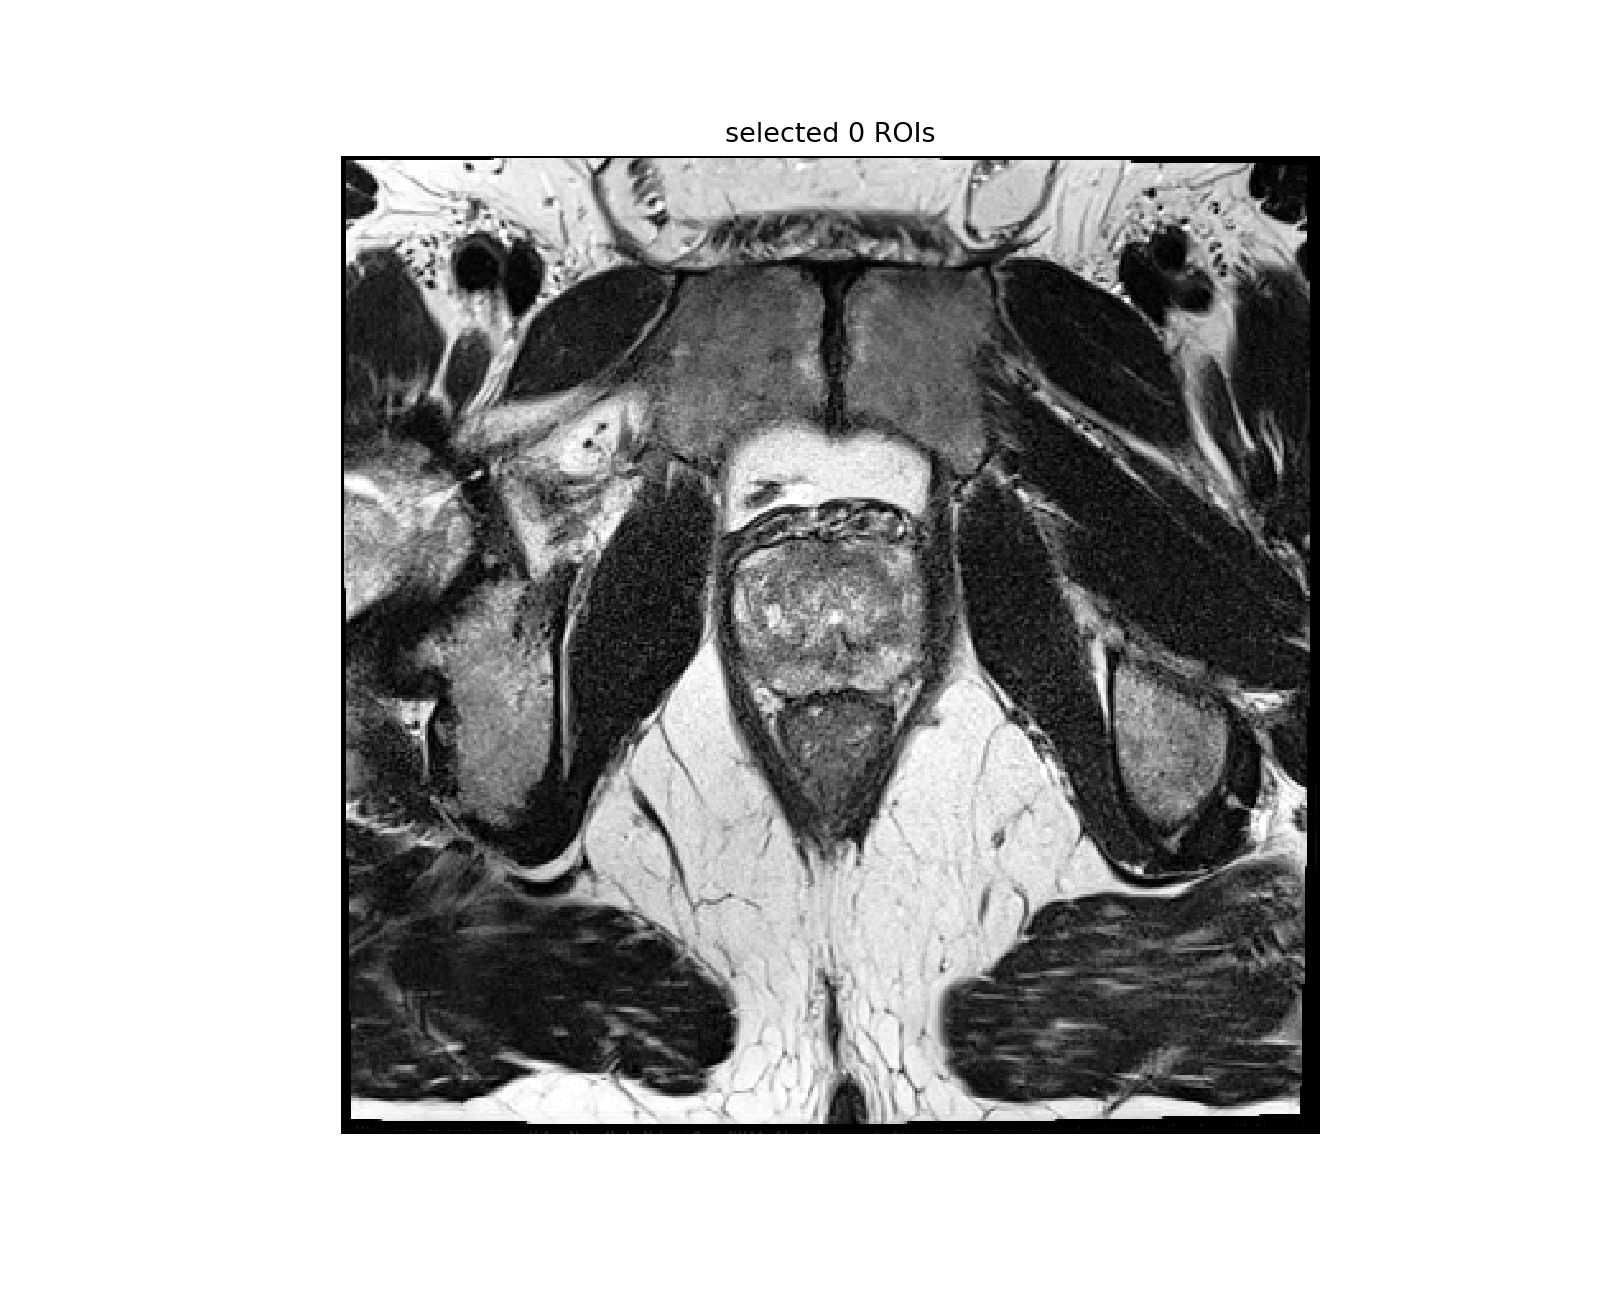

In [77]:
roi_acquisition_interface = gui.ROIDataAquisition(image_nrrd)

Image size: 384 384 19 (0.5, 0.5, 3.0000004768371578)
Image origin: (-73.65409851074219, -77.09700012207033, 44.85970687866211)


<IPython.core.display.Javascript object>


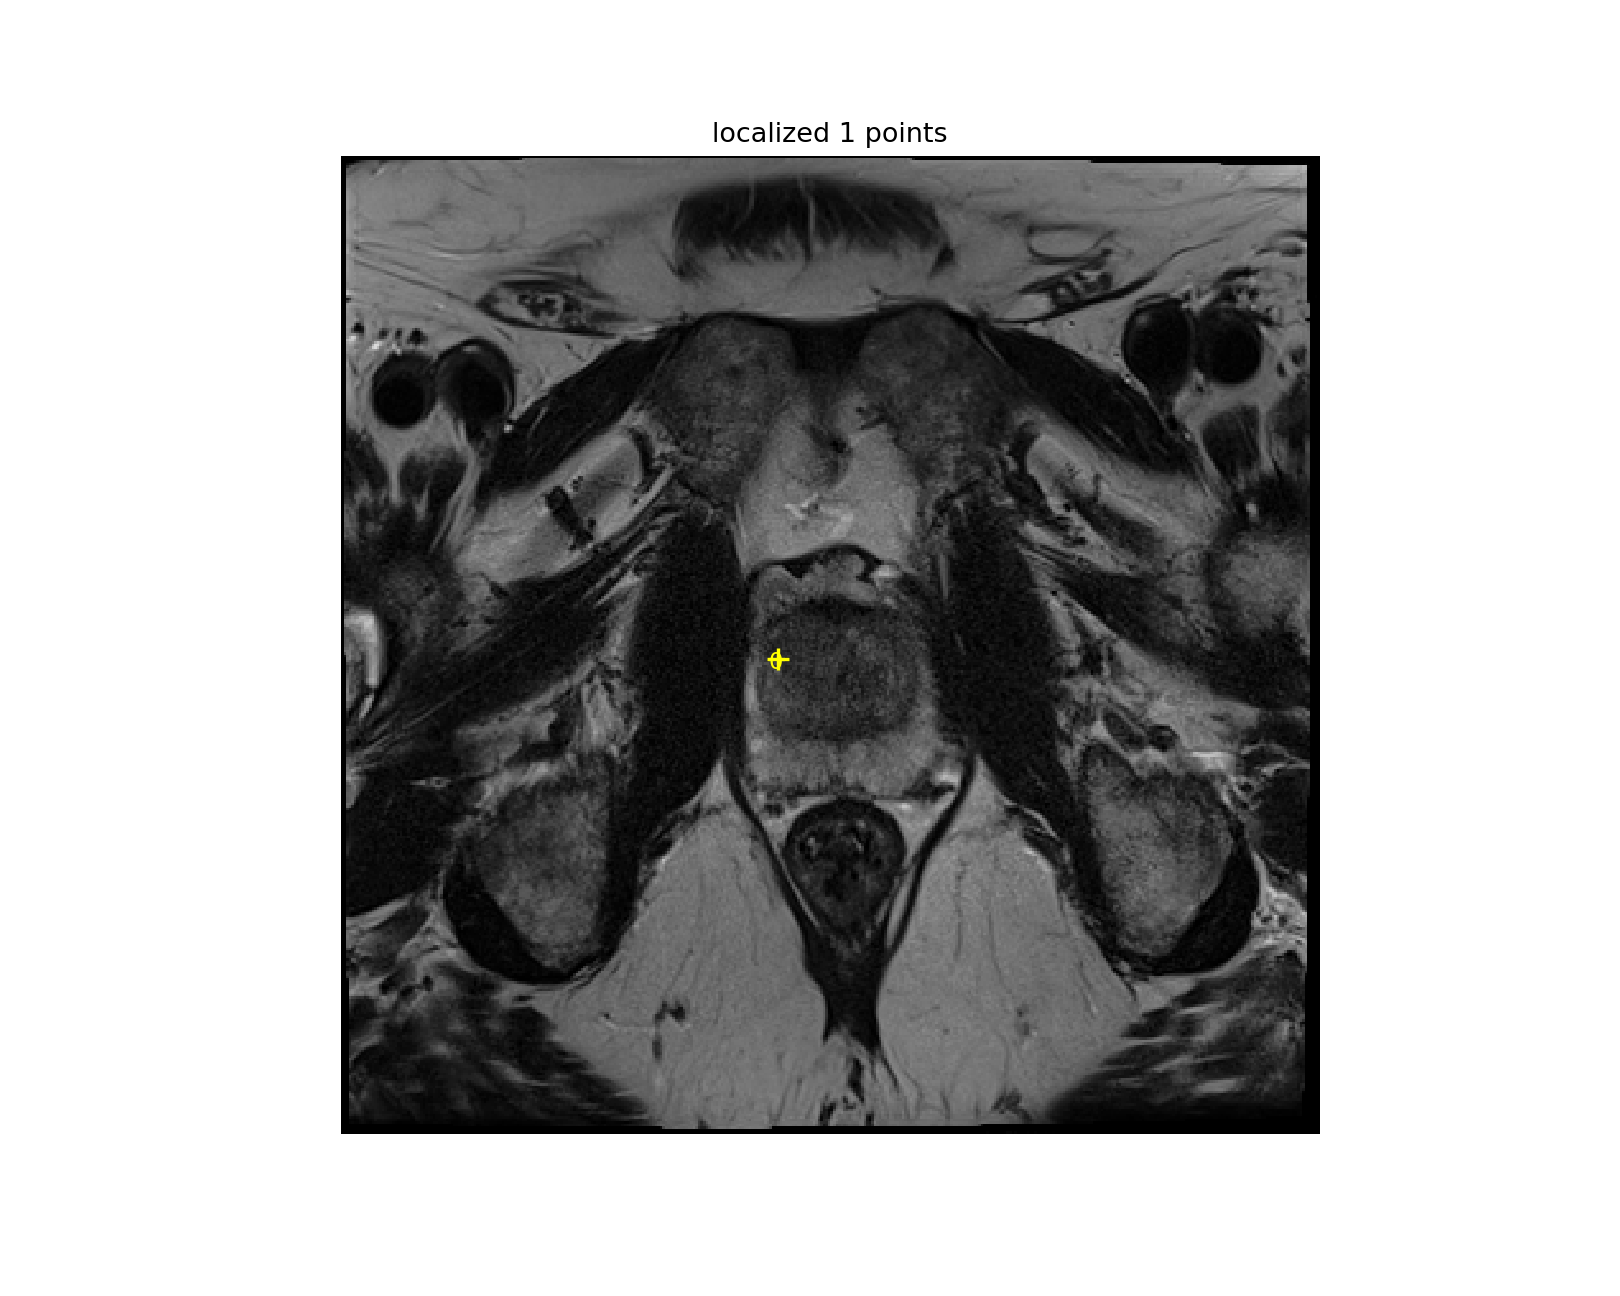

In [78]:
#Loading with lesion in TZ zone and loading T2 transversal__Grade 2
image_path = "D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/intermediate/nrrd-train/ProstateX-0197_t2_tse_tra_9.nrrd"

NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(image_path)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook
size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()
origin = image_nrrd.GetOrigin()

print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)
print("Image origin:", origin)  

point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(171,197,6)])

In [24]:
roi_acquisition_interface = gui.ROIDataAquisition(image_nrrd)

<IPython.core.display.Javascript object>

Image size: 384 384 19 (0.5, 0.5, 2.9999983310699467)
Image origin: (-97.75048828125001, -71.4578323364258, -112.86254119873045)


<IPython.core.display.Javascript object>


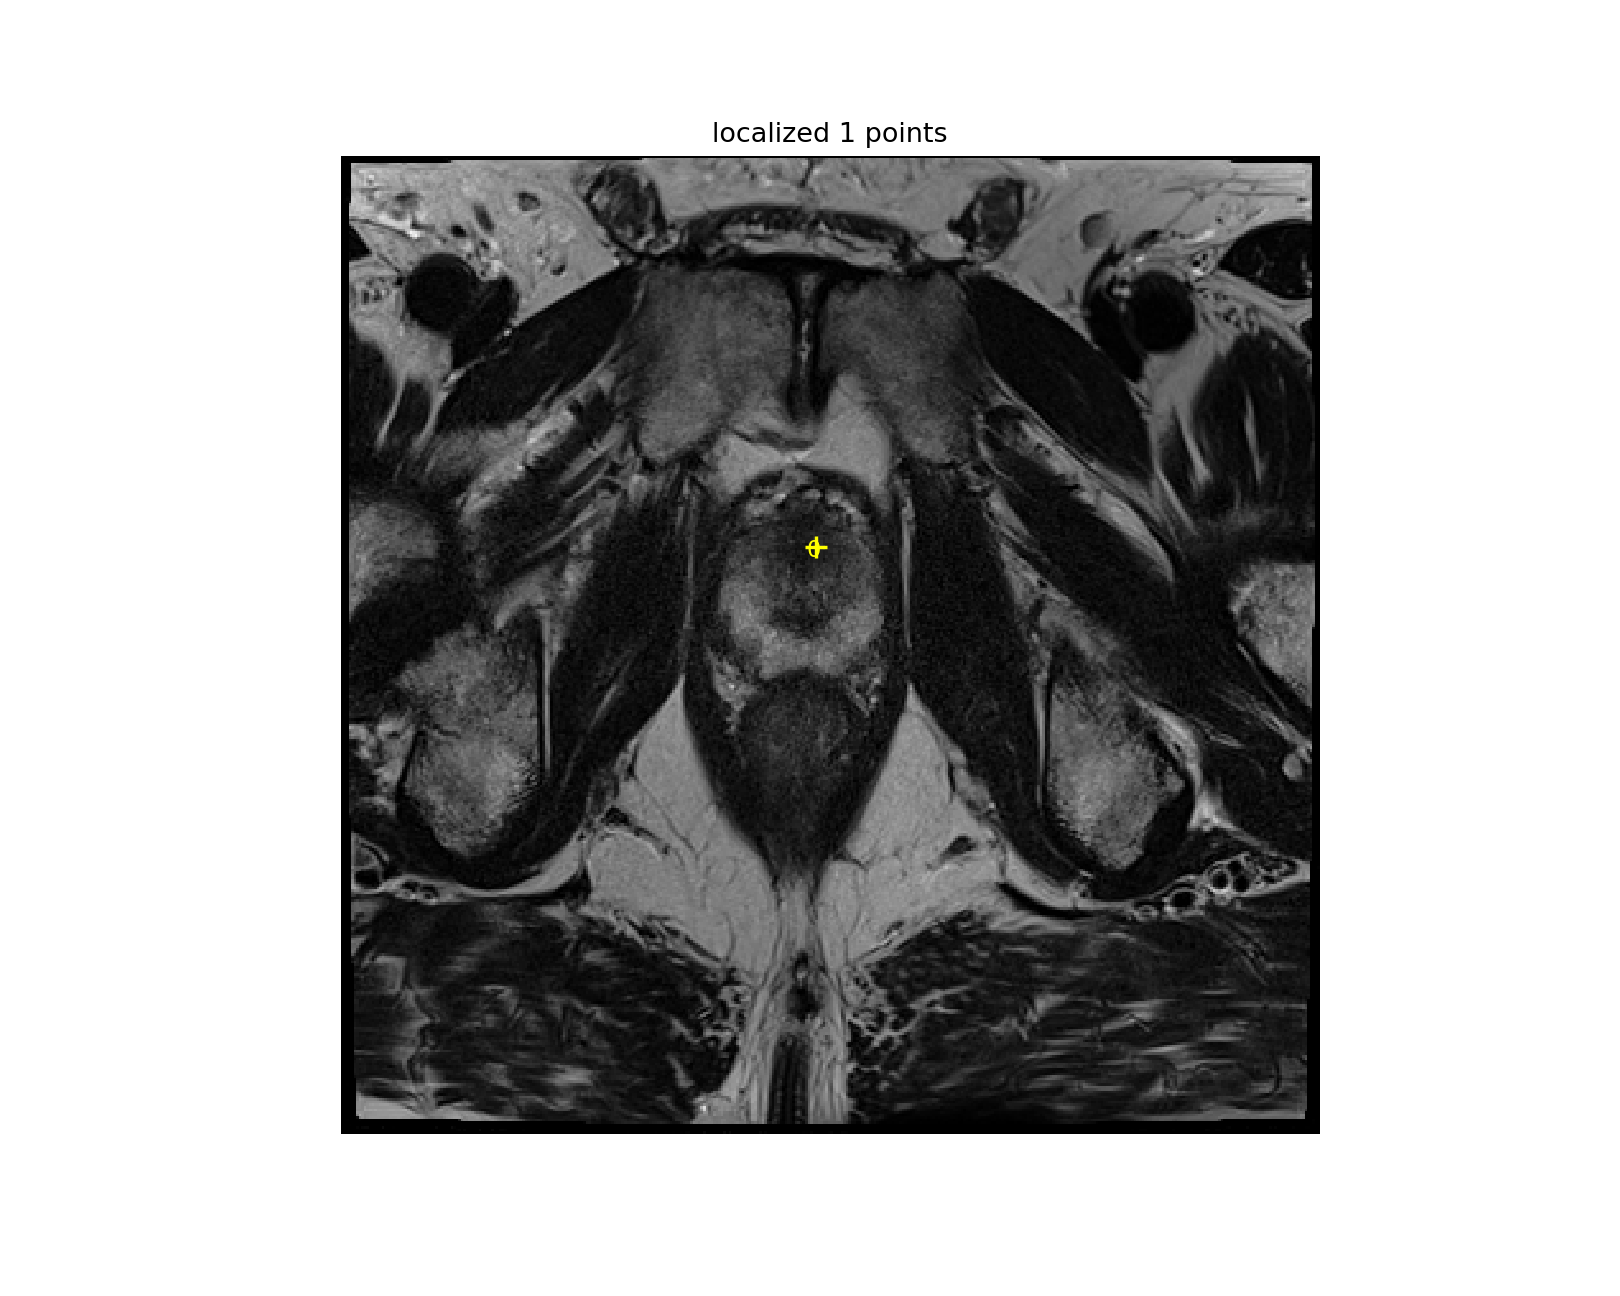

In [79]:
#Loading with lesion in AS zone and loading T2 transversal

image_path = "D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/intermediate/nrrd-train/ProstateX-0198_t2_tse_tra_5.nrrd"

NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(image_path)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook
size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()
origin = image_nrrd.GetOrigin()

print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)
print("Image origin:", origin)  

point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(186,153,7)])


<IPython.core.display.Javascript object>


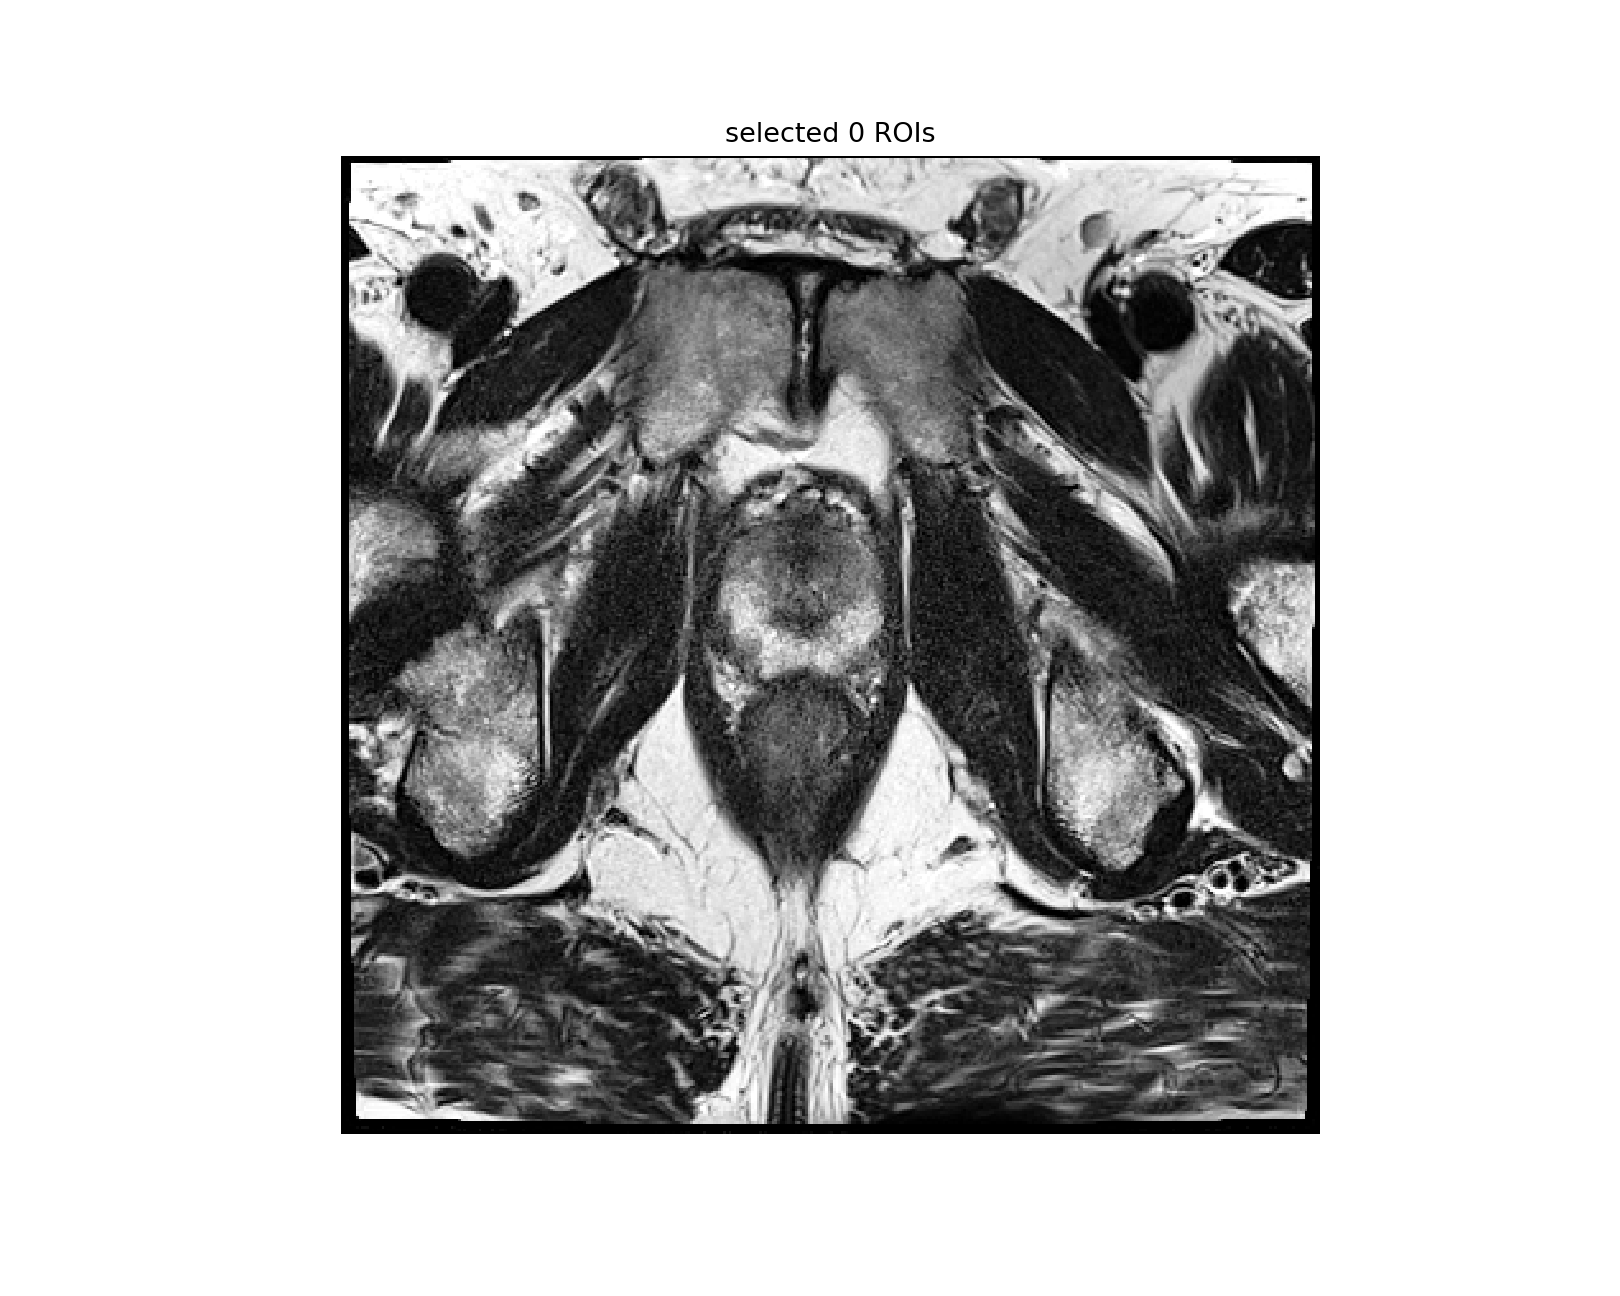

In [80]:
roi_acquisition_interface = gui.ROIDataAquisition(image_nrrd)

In [51]:
#Loading T2 sagital sequence in TZ zone

In [5]:
image_path = "D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/intermediate/nrrd-train/ProstateX-0162_t2_tse_sag_3.nrrd"

NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(image_path)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook
size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()
origin = image_nrrd.GetOrigin()

print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)
print("Image origin:", origin)  

point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(176,195,11)])


Image size: 320 320 19 (0.5625, 0.5625, 3.5999984741210938)
Image origin: (34.32770919799804, -62.88135528564453, 110.24096679687503)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


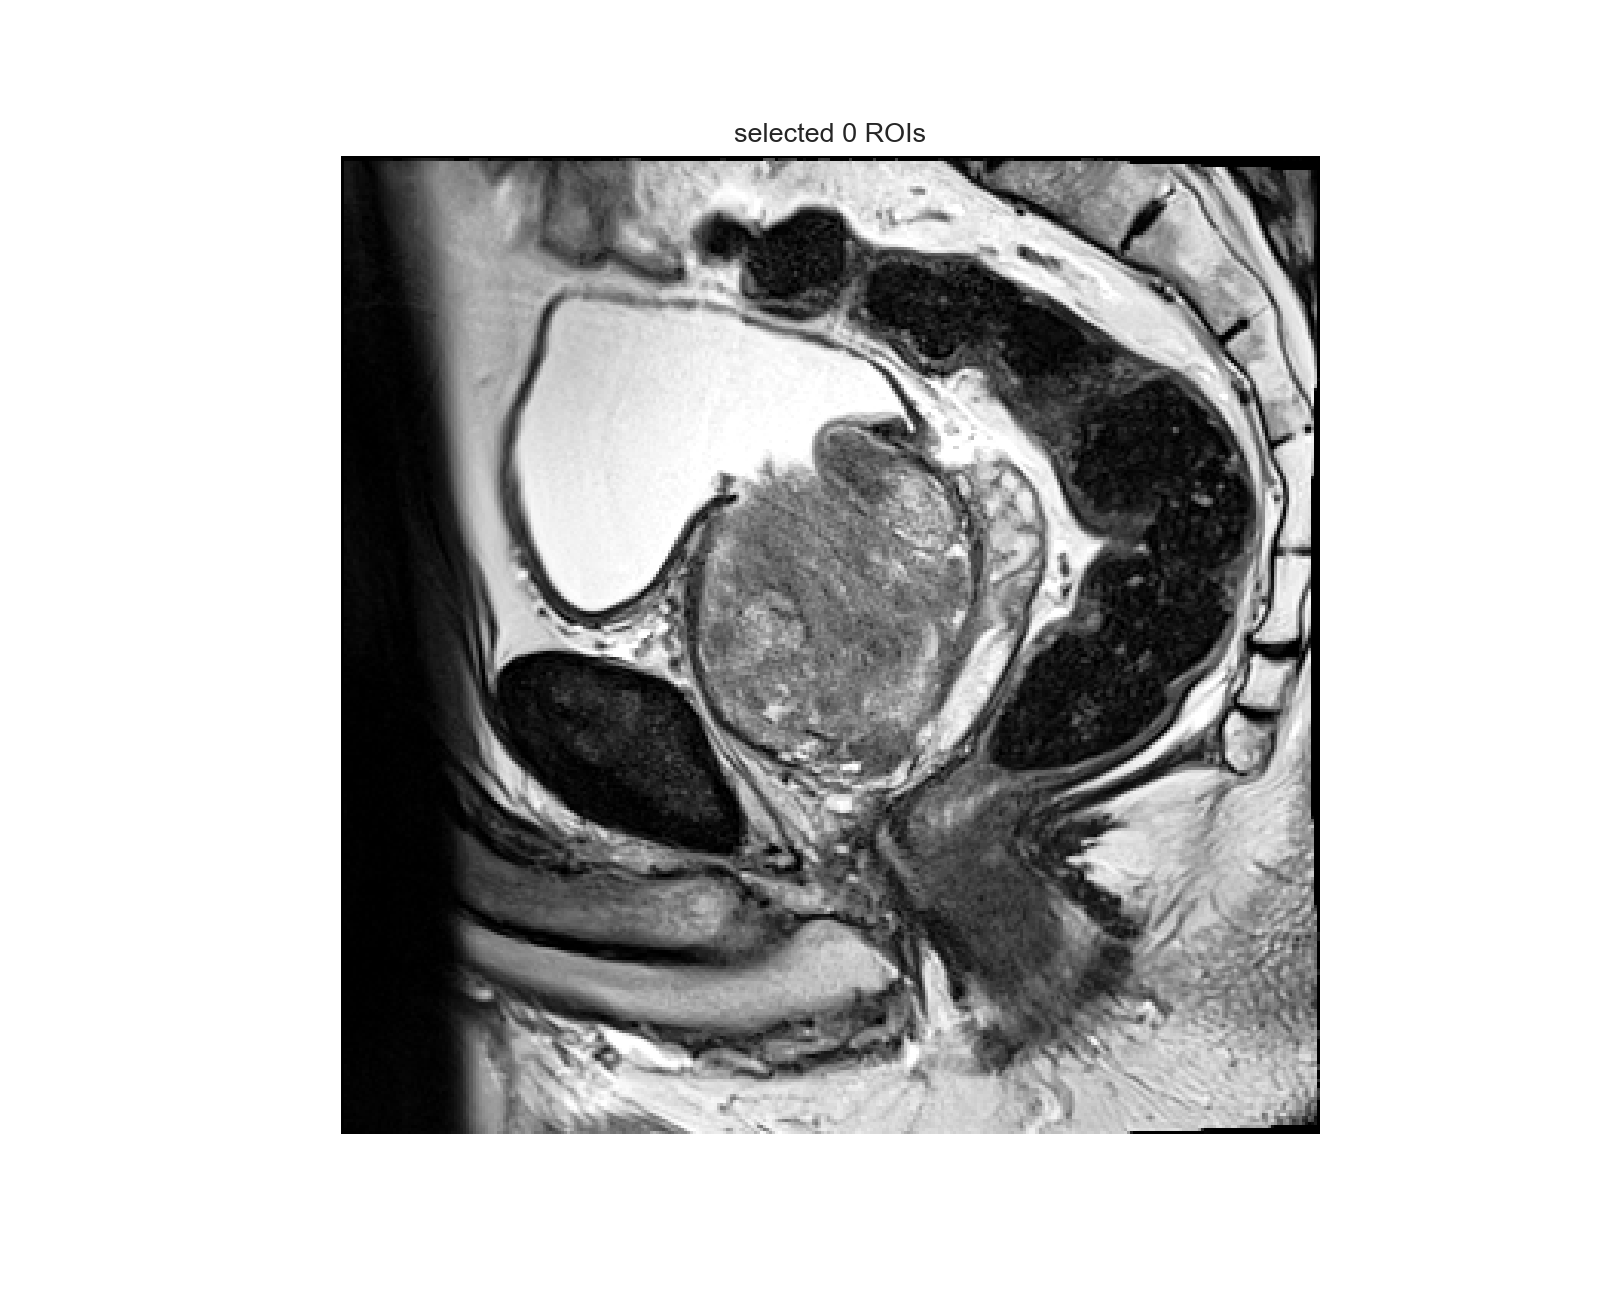

In [53]:
roi_acquisition_interface = gui.ROIDataAquisition(image_nrrd)

Image size: 320 320 19 (0.5625, 0.5625, 3.60000228881836)
Image origin: (32.40000152587891, -53.242801666259766, 74.57831573486327)


<IPython.core.display.Javascript object>


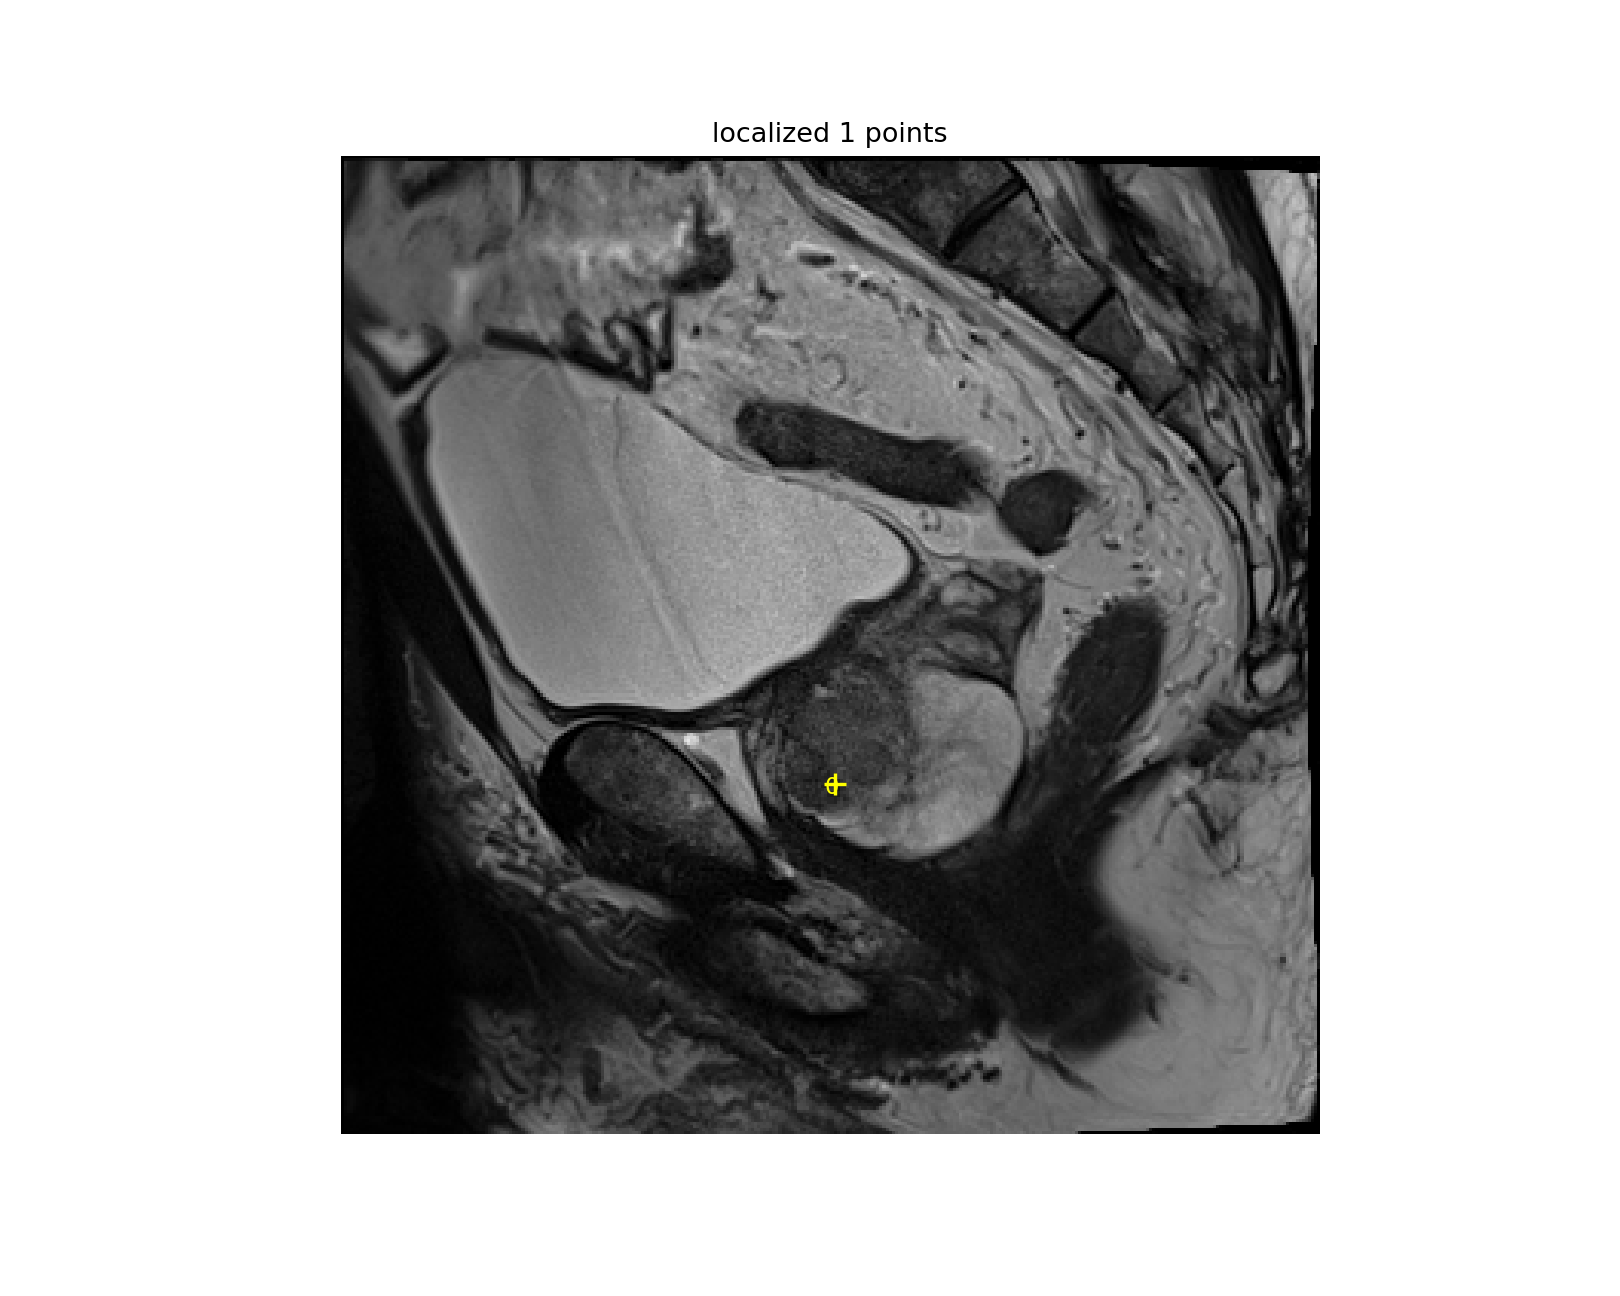

In [11]:
image_path = "D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/intermediate/nrrd-train/ProstateX-0026_t2_tse_sag_3.nrrd"

NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(image_path)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook
size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()
origin = image_nrrd.GetOrigin()

print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)
print("Image origin:", origin)  

point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(161, 205, 10)])

In [54]:
#Loading with DWI Bval sequence in AS zone

Image size: 84 128 19 (2.0, 2.0, 2.999999761581421)
Image origin: (-54.907112121582045, -122.32122802734376, 14.386574745178224)


<IPython.core.display.Javascript object>


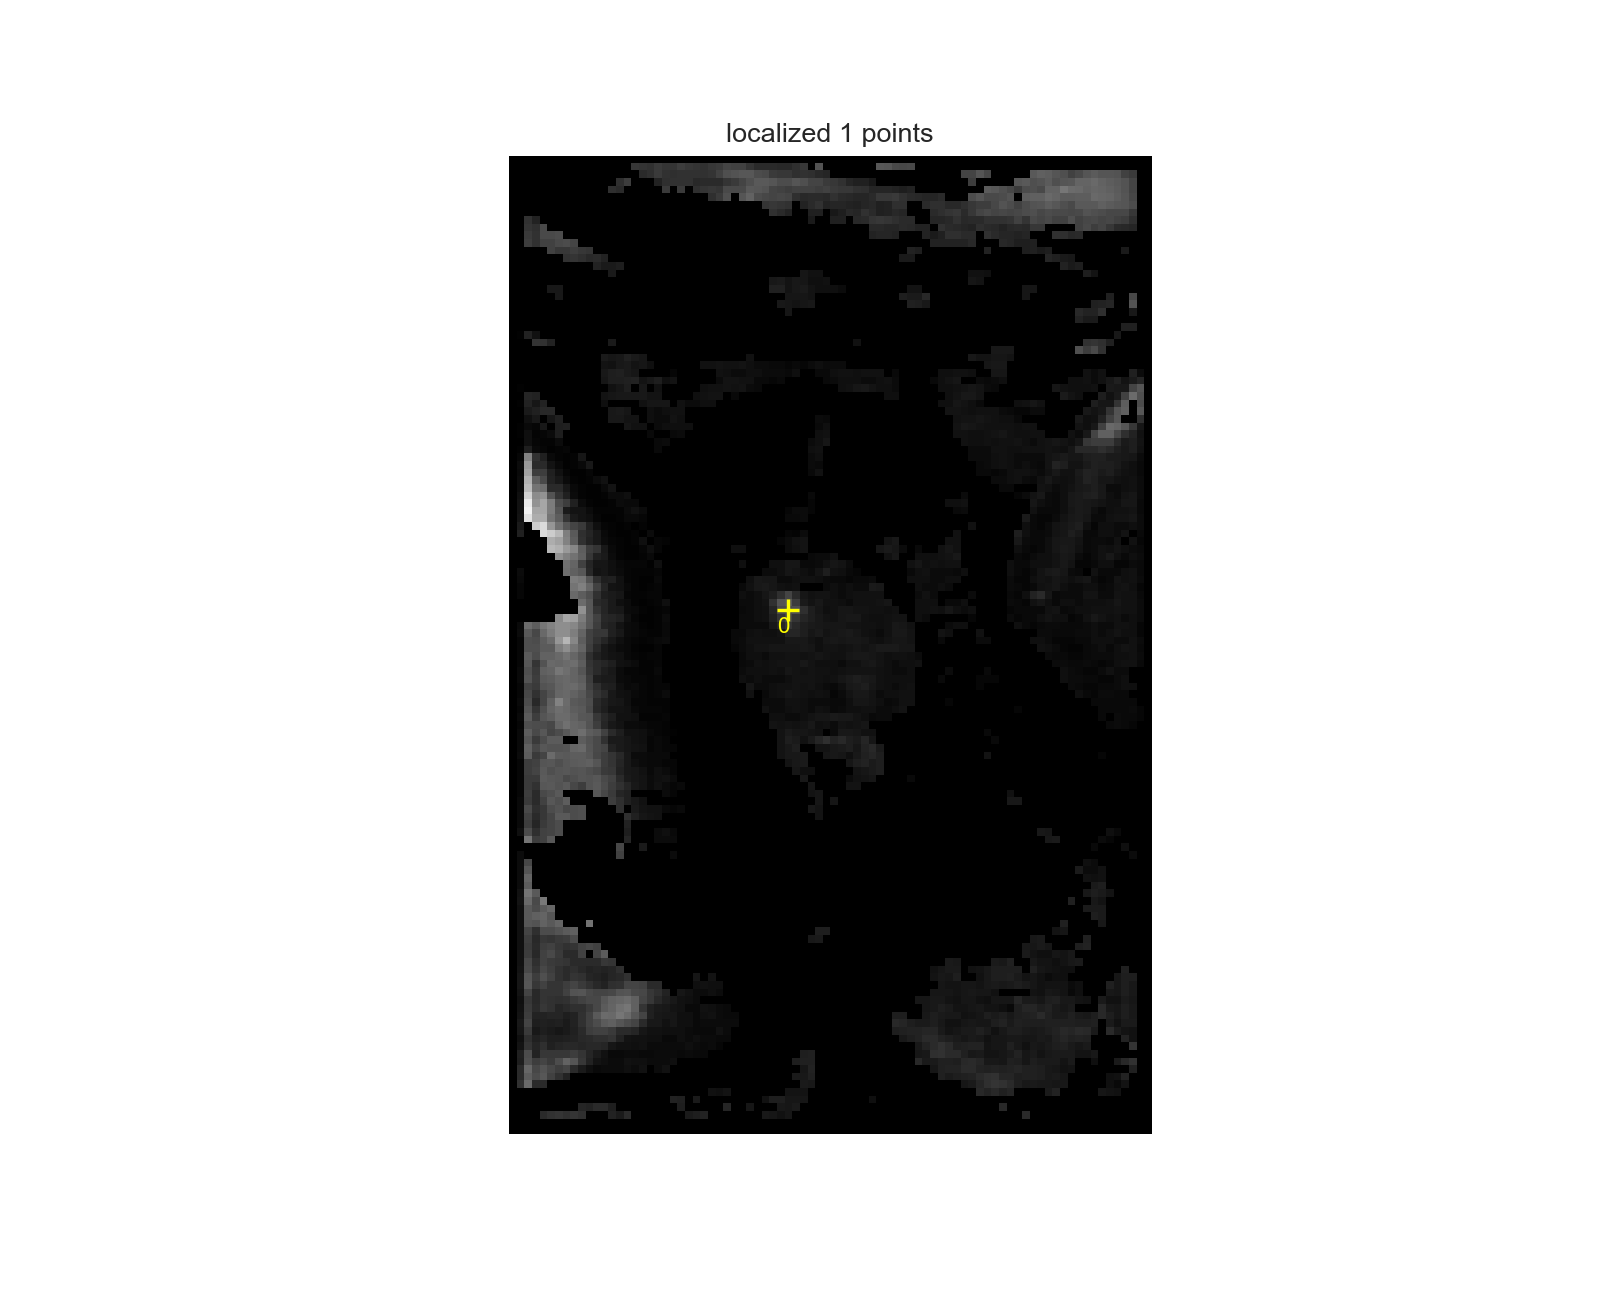

In [55]:
image_path = "D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/intermediate/nrrd-train/ProstateX-0116_ep2d_diff_tra_DYNDISTCALC_BVAL_8.nrrd"

NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(image_path)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook
size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()
origin = image_nrrd.GetOrigin()

print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)
print("Image origin:", origin)  

point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(36,59,9)])


<IPython.core.display.Javascript object>


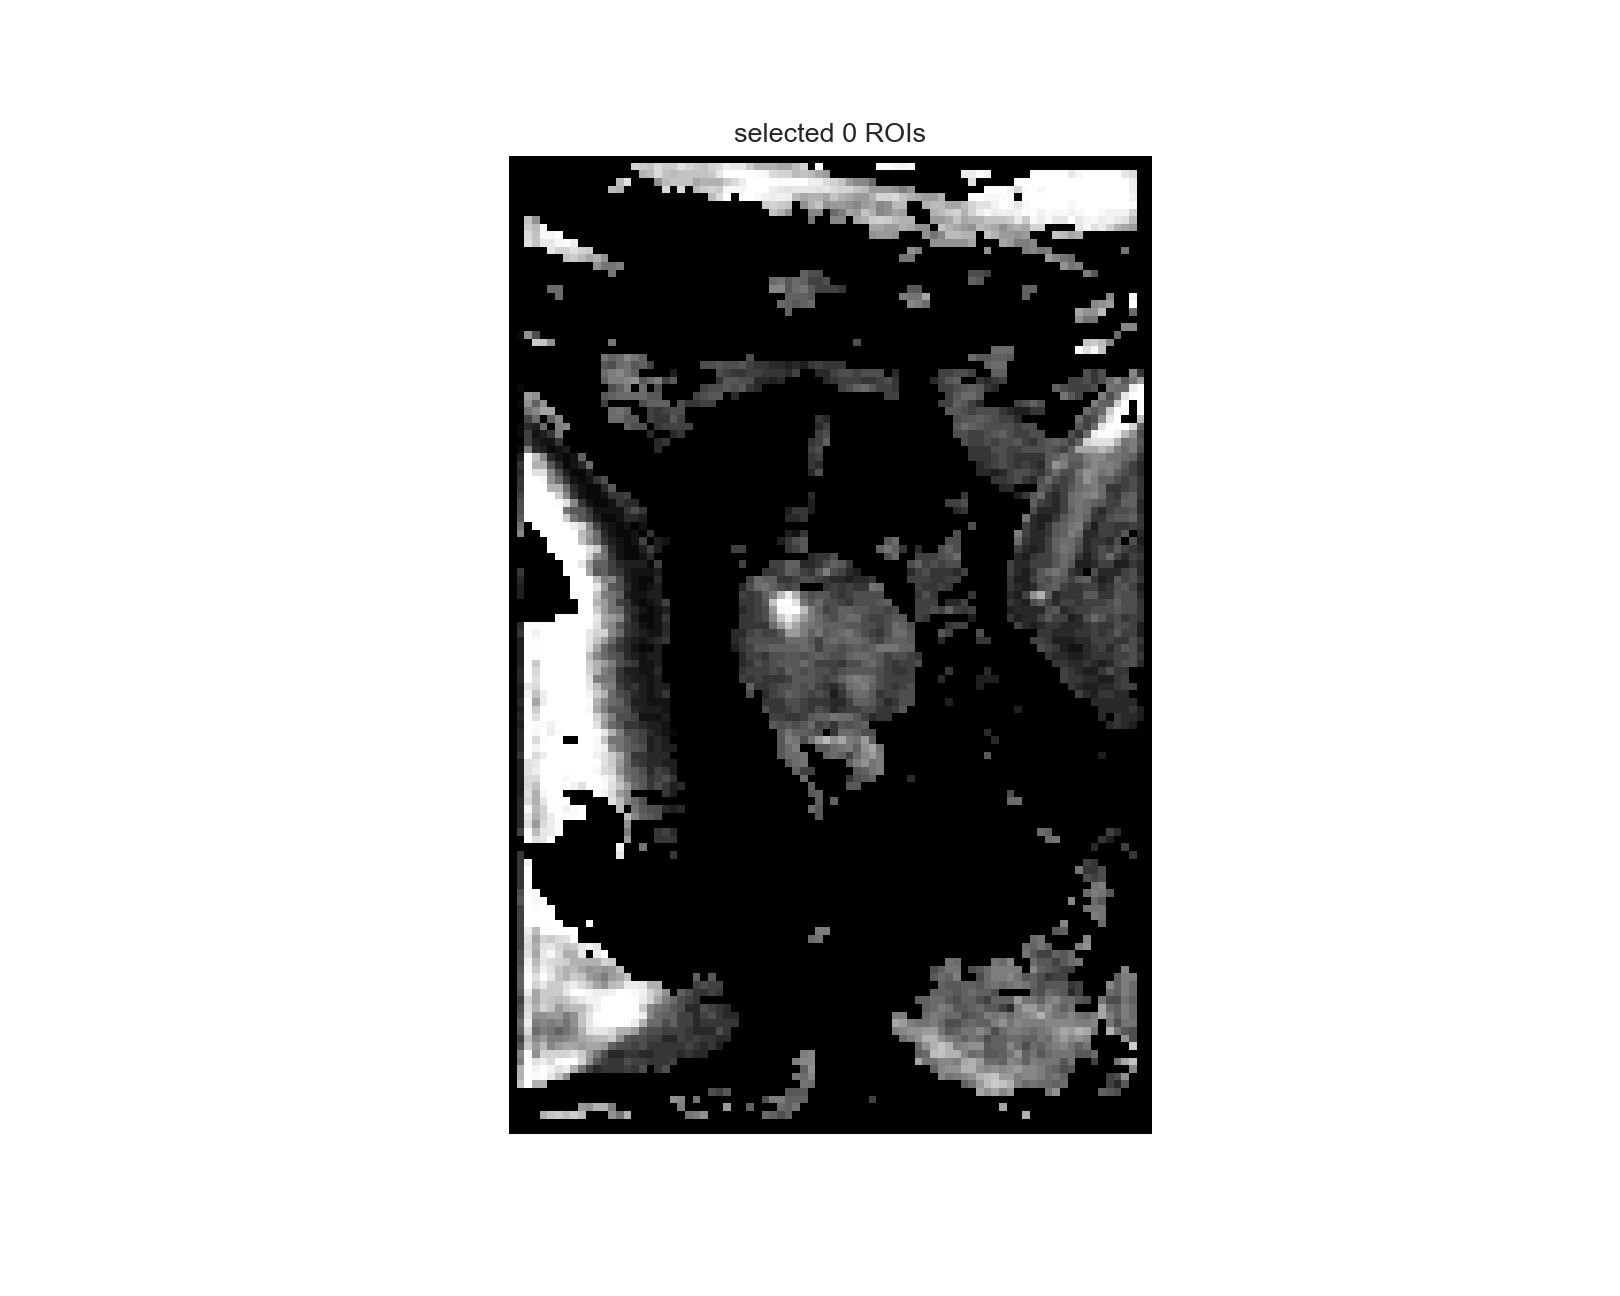

In [56]:
roi_acquisition_interface = gui.ROIDataAquisition(image_nrrd)

In [57]:
#most of the Bval MRI sequences are dark

In [58]:
#Loading with lesion with DCE/ktrans eg. ProxID 0005

Image size: 128 128 16 (1.4999999999999996, 1.499999269128572, 3.9999980510095248)
Image origin: (-86.9342, -58.131099999999975, -29.400199999999998)


<IPython.core.display.Javascript object>


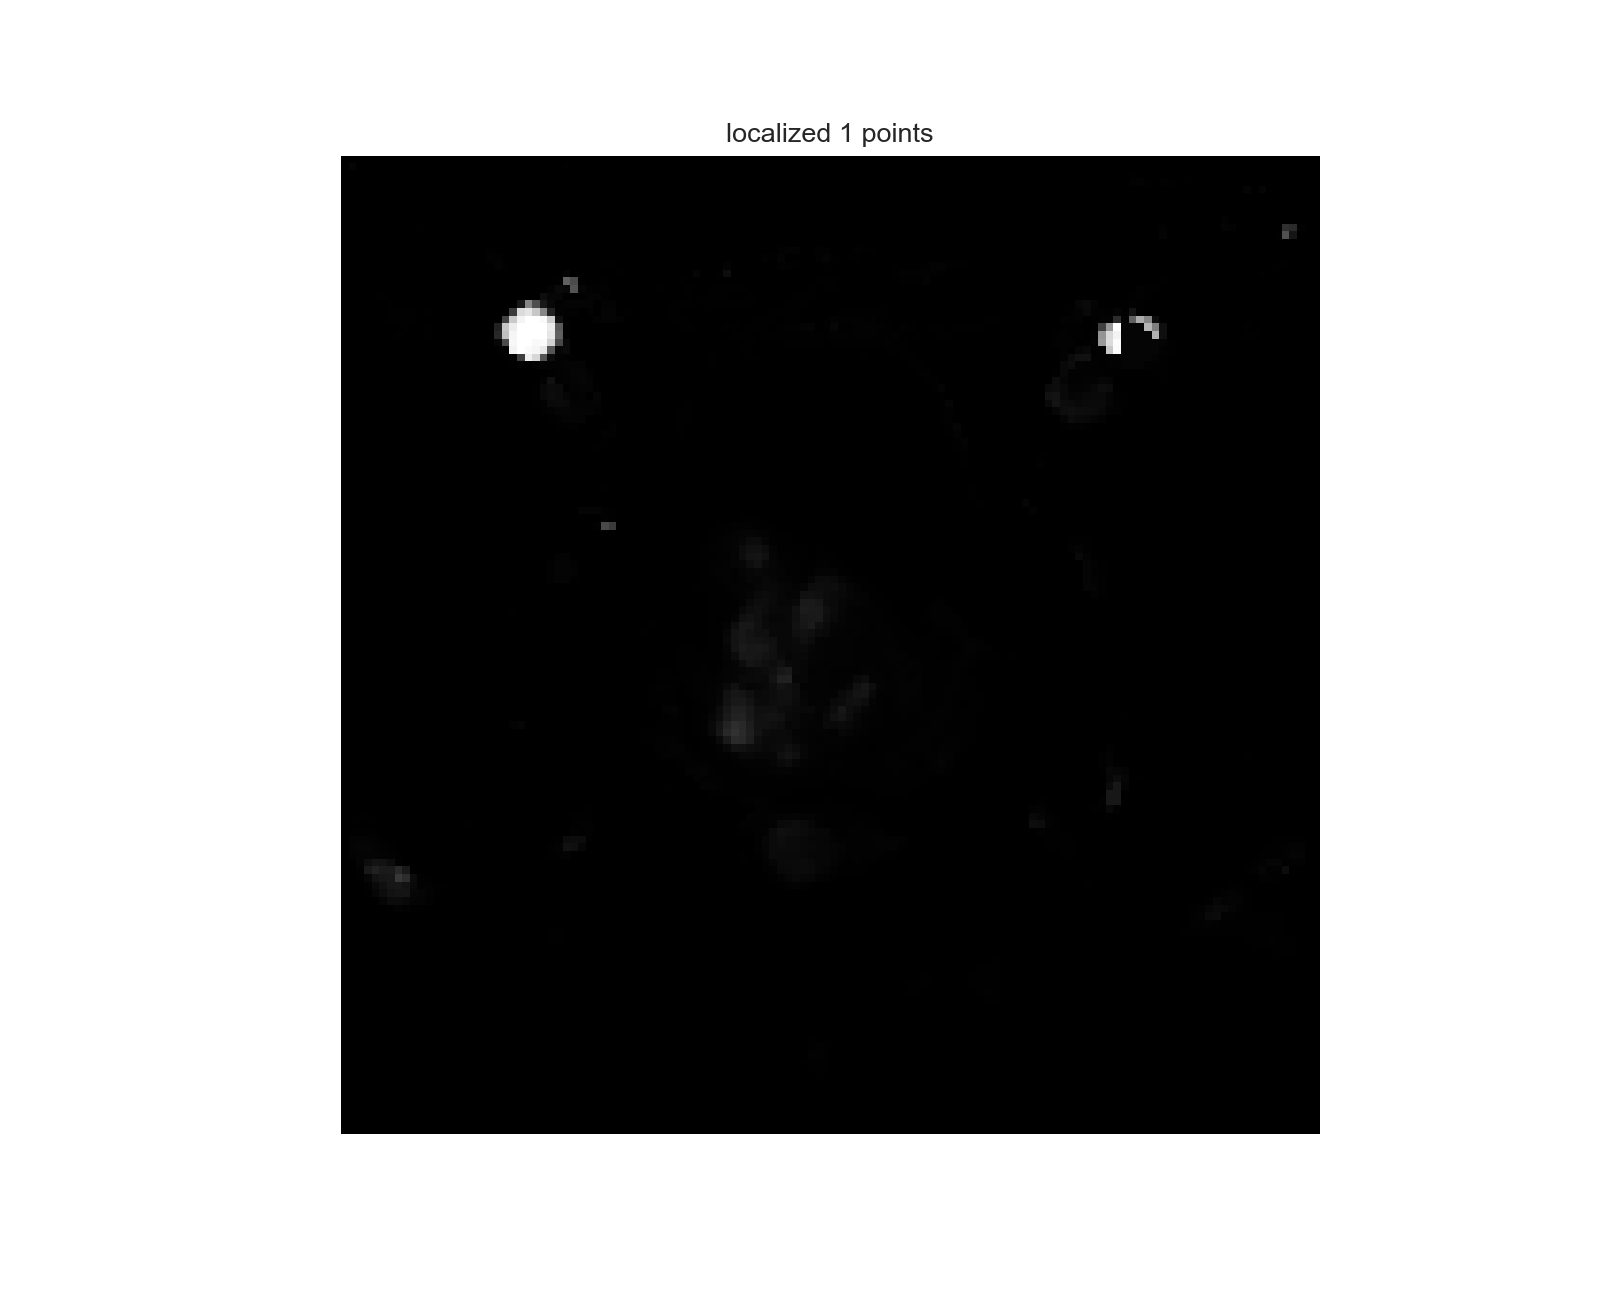

In [59]:
image_path = "D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/intermediate/nrrd-train/ProstateX-0041_Ktrans.nrrd"

NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(image_path)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook
size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()
origin = image_nrrd.GetOrigin()

print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)
print("Image origin:", origin)  

point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(50,79,5)])


<IPython.core.display.Javascript object>


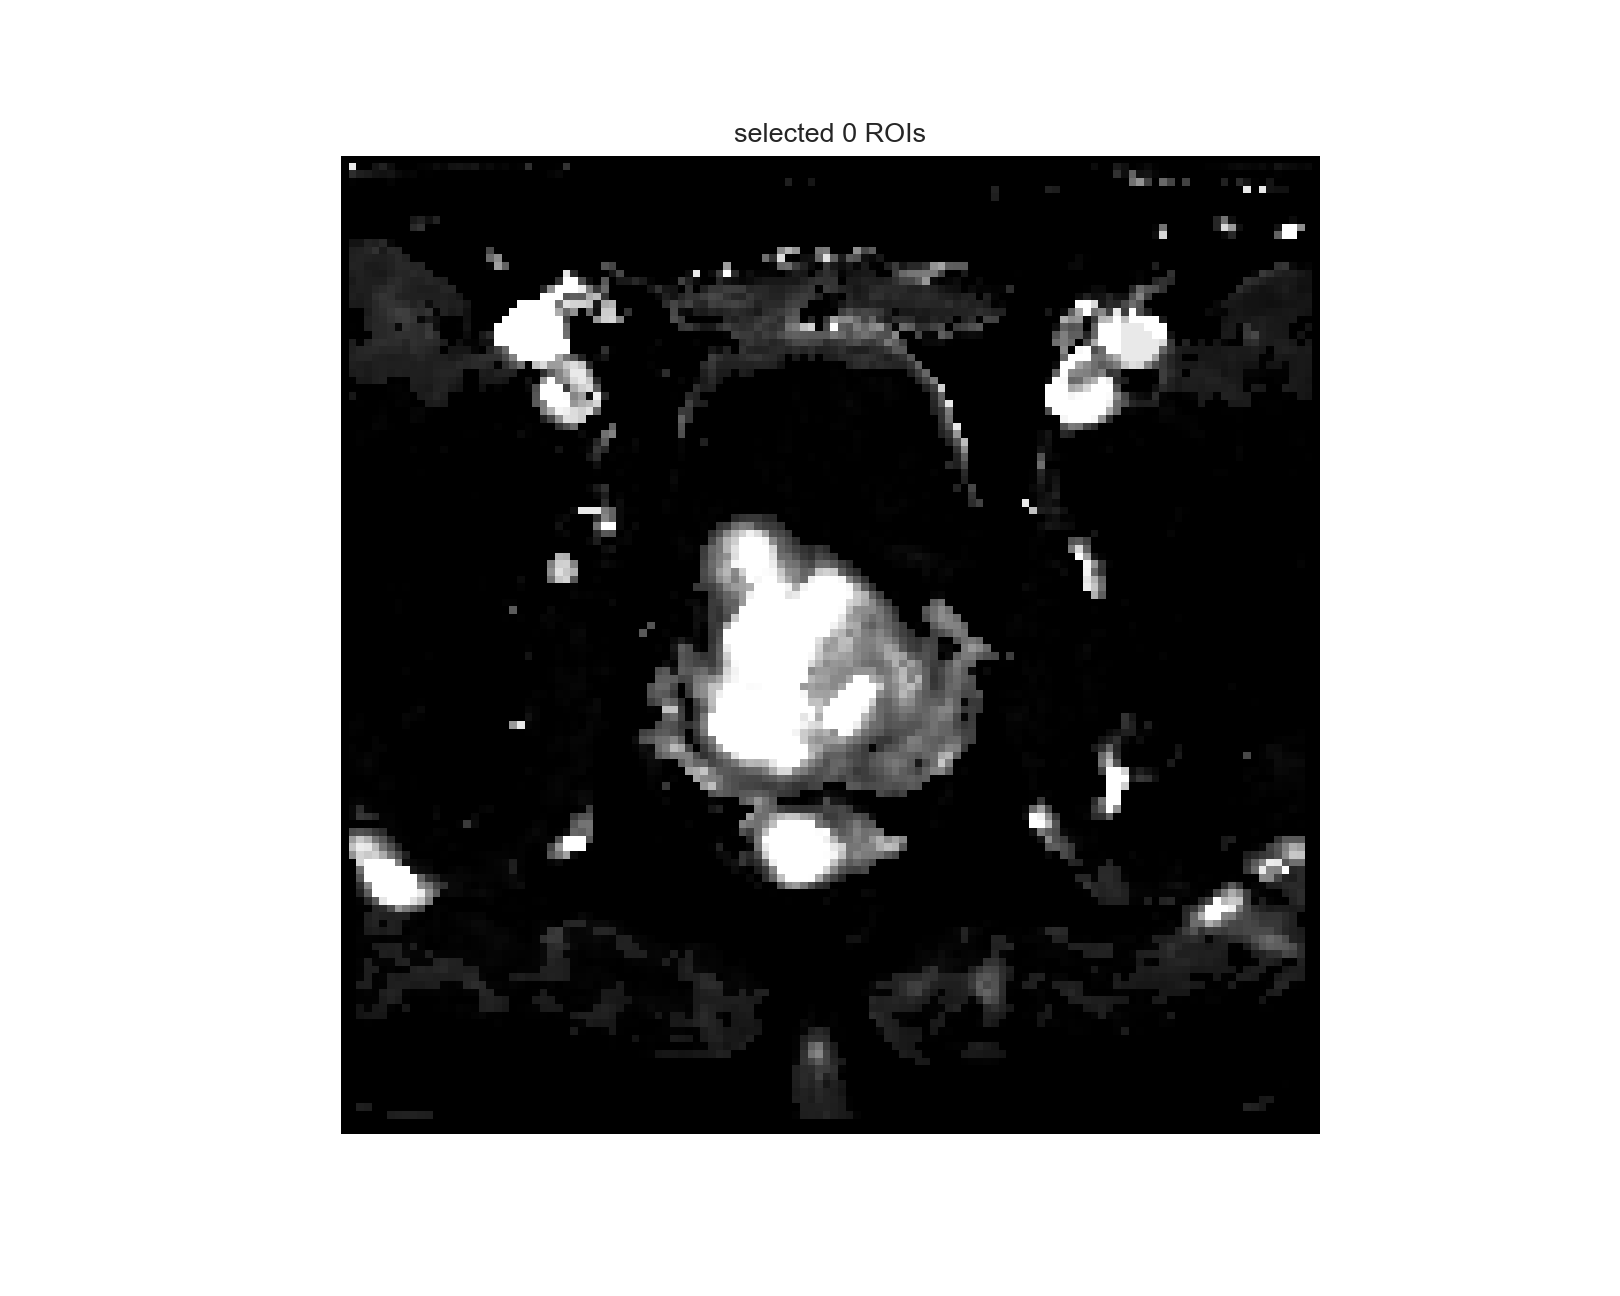

In [60]:
roi_acquisition_interface = gui.ROIDataAquisition(image_nrrd)

In [61]:
#ktrans images are also dark

In [62]:
# To get the multi image display for ADC, PZ zone
image_path = "D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/Training/intermediate/nrrd-train/ProstateX-0005_ep2d_diff_tra_DYNDIST_MIX_ADC_7.nrrd"
NRRDreader = sitk.ImageFileReader()
NRRDreader.SetImageIO("NrrdImageIO")
NRRDreader.SetFileName(image_path)
image_nrrd = NRRDreader.Execute();
%matplotlib notebook
size_nrrd = image_nrrd.GetSize()
spacing_nrrd = image_nrrd.GetSpacing()
origin = image_nrrd.GetOrigin()

print("Image size:", size_nrrd[0], size_nrrd[1], size_nrrd[2], spacing_nrrd)
print("Image origin:", origin)  

point_acquisition_interface = gui.PointDataAquisition(image_nrrd)
point_acquisition_interface.set_point_indexes([(46,75,9), (34,71,9)])



Image size: 84 128 19 (2.0, 2.0, 3.000000953674317)
Image origin: (-105.02759552001956, -100.64813232421868, 6.8096995353698695)


<IPython.core.display.Javascript object>

In [63]:
# To get the multi image display for ADC
#gui.MultiImageDisplay([mr_image,ct_image], figure_size=(10,3),window_level_list=[mr_window_level,ct_window_level])

# image_nrrd_window_level = 
#gui.MultiImageDisplay([image_nrrd,image_nrrd], figure_size=(10,3),window_level_list=[image_nrrd_window_level,image_nrrd_window_level])


## Pre processing  - Nrrd format


compile_meta_data.py: This script merges the ProstateX-Images (or ProstateX-Images-Ktrans) data frames with ProstateX-Findings. It also appends paths to the resampled NIFTI files for each case for use in the patch extraction script. The user is presented with the option to compile the meta data for the training or test datasets when the script is executed. Output is saved to the dataframes folder as appropriate.

In [202]:
import sys
sys.path.insert(0, 'D:/MSCA/CAPSTONE/DORA-PROSTATE CHALLENGE/code3/src/src/01-preprocessing/DivyaNrrd/github')
import complile_meta_data

Patch Extraction

 patch_sizes = {
        't2': 64,
        'adc': 16,
        'bval':16,
        'ktrans':16
    }

In [4]:
# view the extracted/rotated patches of image from a train of np array

#T2 transversal patch
import numpy as np
img_array = np.load('D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/GithubCodeNrrd/Train/numpy/ijk/t2tra/X_train_ijk.npy')


print("Dimension of the patch is:", img_array[3].shape)
#plt.imshow(np.squeeze(img_array[3][:, :, 30]), cmap="gray")
type(img_array[3])


Dimension of the patch is: (224, 224, 3)


numpy.ndarray

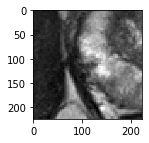

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
T=img_array[5][:,:,0] #Plotting the image at z=0)
plt.imshow(T, cmap='gray')

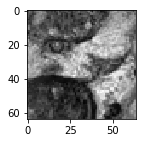

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
T=img_array[3][0,:,:] #Plotting the image at z=0)
plt.imshow(T, cmap='gray')

# or plt.imshow(np.squeeze(img_array[3][2,:, :]), cmap="gray")

In [5]:
import matplotlib.pyplot as plt
T=img_array[3][1,:,:] #Plotting the image at z=1)
plt.imshow(T, cmap='gray')

In [6]:
T=img_array[3][2,:,:] #Plotting the image at z=2)
plt.imshow(T, cmap='gray')

In [7]:
# view the extracted/rotated patches of image from a train of np array

#T2 transversal patch
import numpy as np
img_array = np.load('D:/MSCA/CAPSTONE/Prostate2Challenge-Team2/GithubCodeNrrd/Train/numpy/ijk/t2sag/X_train_ijk.npy')

img_array.shape


# index = 22
# plt.figure(figsize = (2,2))
# plt.imshow(img_array[index],cmap='gray')

# # print ("y = " + str(train_y[0, index]) + ". It's a " + classes[train_y[0, index]].decode("utf-8") + " patch.")

import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
T=img_array[3][0,:,:] #Plotting the image at z=0)
plt.imshow(T, cmap='gray')

# or plt.imshow(np.squeeze(img_array[3][2,:, :]), cmap="gray")

